## Изучение данных из файла

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 9)

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Таблица с пропусками

In [5]:
def show_missing():

    missing = {'col_name': [], 'missing_rate': [], 'col_type': []}

    for col in data.columns:
        if data[col].isna().mean() != 0:
            missing['col_name'].append(col)
            missing['missing_rate'].append(data[col].isna().mean())
            missing['col_type'].append(data[col].dtype)

    missing_df = pd.DataFrame(missing,
                              index=missing['col_name']).drop('col_name',
                                                              axis=1)
    return missing_df.sort_values(by='missing_rate', ascending=False)

In [6]:
show_missing()

,missing_rate,col_type
is_apartment,0.882906,object
parks_nearest,0.659100,float64
ponds_nearest,0.615596,float64
balcony,0.486054,float64
ceiling_height,0.387991,float64
airports_nearest,0.233850,float64
cityCenters_nearest,0.232879,float64
parks_around3000,0.232837,float64
ponds_around3000,0.232837,float64
days_exposition,0.134225,float64


In [7]:
display(data.iloc[:, :14].describe())
display(data.iloc[:, 14:].describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000


,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
data.select_dtypes(include='object').describe()

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


### Вывод

1) В исходном наборе данных наблюдается 14 столбцов с пропусками, из которых 12 имеют числовой тип, и 2 - нечисловой.  
  
2) Существуют столбцы, пропуски в которых занимают существенную долю от всех данных вплоть до 88,29% пропусков для столбца `is_apartment`. В таком случае наличие пропуска несет в себе информацию, а значит в этих столбцах нельзя заменить пропуски на какие-то стактистики: среднее, медиану, моду и т.д. Лучше всего будет, либо понять по смыслу данных, что под собой подразумевает пропуск, либо создать специальное значение, которое будет давать понять, что на его месте был пропуск.  
  
3) Также существуют признаки с малым количеством пропусков (минимально 0,2%-0,3%). В таких столбцах пропуски можно заполнить стандартными методами, либо отбросить эти строки.  
  
4) В данных, есть признаки (например, `last_price`) с выбросами.  
  
5) Неоходимо переименовать признак `cityCenters_nearest` в соответствии со "snake_case"-стилем.  
  
6) Есть признак, содержащий дату и время, его нужно привести к типу `datetime`.  
  
7) Для сокращения использования памяти можно применить "downcast"-преобразование числовых данных и приведение к типу `category` строковых данных.  

## Предобработка данных

### Вспомогательные функции

In [9]:
def observe_cat_col(col_name):
    col_count = data[col_name].value_counts(dropna=False)
    col_count.plot(kind='bar', grid=True)
    plt.legend()
    return col_count


def observe_num_col(col_name, xlim=None, bins=10):
    data[col_name].plot(kind='hist', grid=True, xlim=xlim, bins=bins)
    plt.legend()
    plt.show()
    data.boxplot(col_name)
    plt.show()
    return data[col_name].describe()


def fill_by_group(filled_col_name, groupedby_col_name, aggfun_name='median'):
    """
        заполняет столбец filled_col_name, медианым значением столбца groupedby_col_name
    """
    try:
        (data[filled_col_name].fillna(data.groupby(groupedby_col_name)
                                      [filled_col_name].transform(aggfun_name),
                                      inplace=True))
        return
    except:
        return "wrong_input_error"


def create_mode_miss_rate_df(feat_1):
    tmp_dict = {'index': [], 'mode': [], 'miss_rate': []}

    for i in data['locality_name'].unique():
        sample = data.loc[data['locality_name'] == i, :]
        miss_rate_by_locality = sample[feat_1].isna().mean()
        if 0 < miss_rate_by_locality < 1:
            tmp_dict['index'].append(i)
            tmp_dict['mode'].append(sample[feat_1].mode().values[0])
            tmp_dict['miss_rate'].append(sample[feat_1].isna().mean())

    return pd.DataFrame(data=tmp_dict, index=tmp_dict['index'])


def check_miss_rate(feat):
    print(f"Доля пропусков в столбце '{feat}': {data[feat].isna().mean():.2%}")


def downcast():
    # уменьшение потребления памяти для float
    data_float = data.select_dtypes(include=['float']).apply(pd.to_numeric,
                                                             downcast='float')
    # уменьшение для int
    data_int = data.select_dtypes(include=['int']).apply(pd.to_numeric,
                                                         downcast='unsigned')
    # для категориальных
    data_cat = data.select_dtypes(include=['object']).astype('category')
    data_other_types = data.select_dtypes(
        exclude=['float', 'int', 'category', 'object'])
    res_df = pd.concat([data_cat, data_float, data_int, data_other_types],
                       axis=1)
    return res_df

### Пропуски

#### locality_name

Сначала отбросим строки, в которых пропуск в колонке `locality_name`. Чем их заполнять неясно. Их всего 0,2%. Сам факт наличия пропуска в этом поле считаю не информативным.

In [10]:
data.dropna(subset=['locality_name'], inplace=True)
check_miss_rate('locality_name')

Доля пропусков в столбце 'locality_name': 0.00%


#### is_apartment

В России апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

NaN      20890
False     2710
True        50
Name: is_apartment, dtype: int64

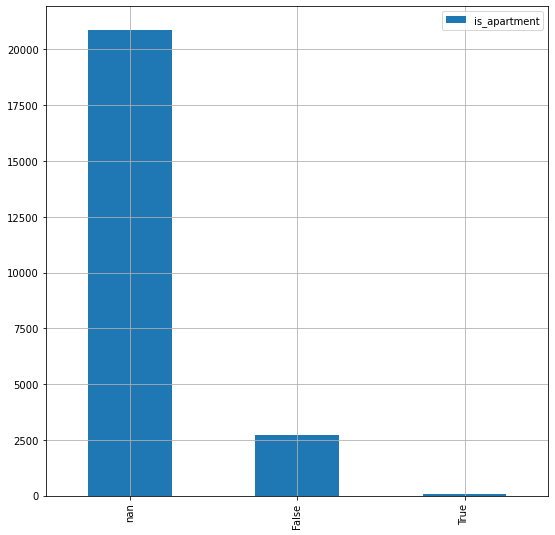

In [11]:
observe_cat_col('is_apartment')

Отбрасывать значения в этом столбце нельзя, потому что строк с пропусками здесь слишком много. Заполнять `False` неправильно, потому что существует много типов жилья помимо апартаментов, поэтому нельзя потерять информацию о том, что тут был пропуск.  
Таким образом, наиболее логичная замена "Другое".

Доля пропусков в столбце 'is_apartment': 0.00%


Other    20890
False     2710
True        50
Name: is_apartment, dtype: int64

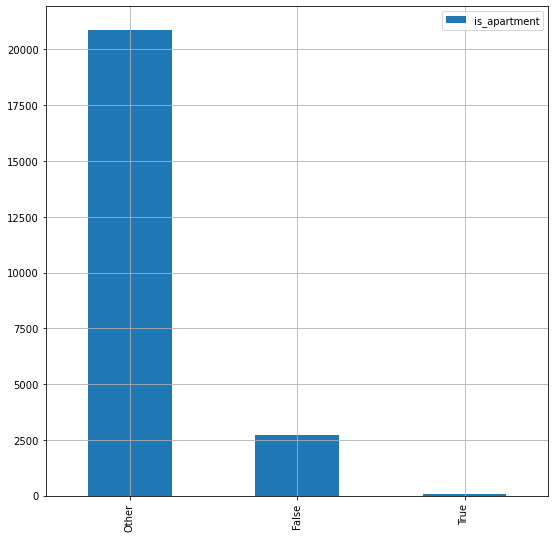

In [12]:
data['is_apartment'].fillna('Other', inplace=True)
check_miss_rate('is_apartment')
observe_cat_col('is_apartment')

#### parks_

`parks_nearest` — расстояние до ближайшего парка (м)  
Предполагаю, что пропуски в этом столбце означают, что поблизости нет парка.  

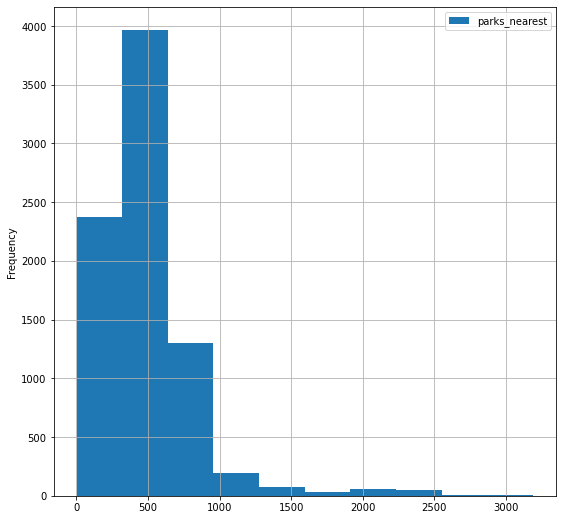

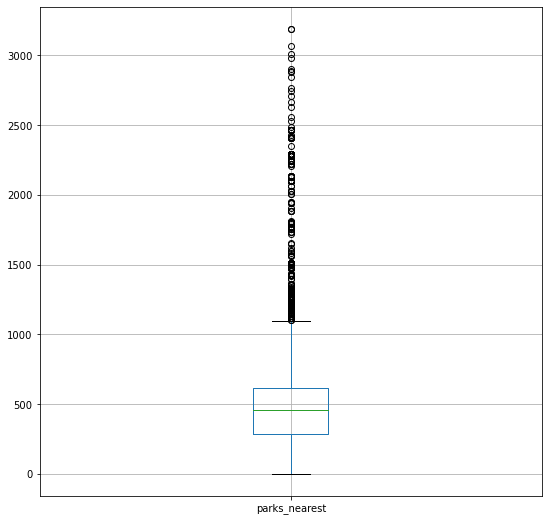

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [13]:
observe_num_col('parks_nearest')

Важно заметить, что минимум не равен 0.  
Также в этом столбце наблюдаются выбросы.

In [14]:
data[data['parks_nearest'].isna()]['parks_around3000'].value_counts(
    dropna=False)

0.0    10076
NaN     5510
Name: parks_around3000, dtype: int64

Большинство домов, для которых значение `parks_nearest` пропущено, не имеют в радиусе 3 км ни одного парка, либо их количество пропущено. Необходимо сначала заполнить пропуски в столбце `parks_around3000`. И посмотреть, может быть, все-таки рядом есть парки.  

Рассмотрим поближе столбец `parks_around3000`

0.0    10080
1.0     5671
NaN     5510
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

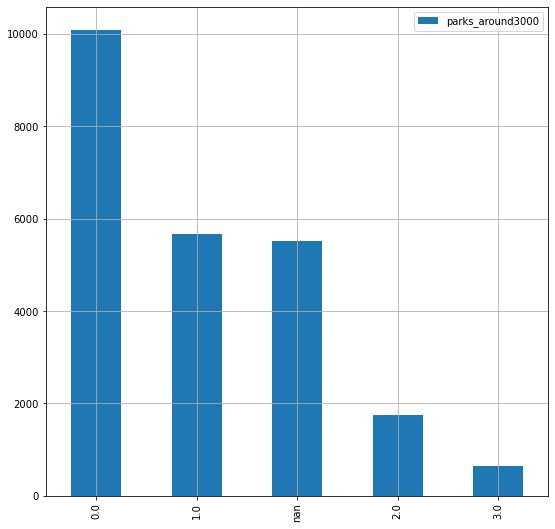

In [15]:
observe_cat_col('parks_around3000')

Рассмотрим населённые пункты, в которых есть пропуски, но пропущены не все значения.

In [16]:
create_mode_miss_rate_df('parks_around3000')

,index,mode,miss_rate
Санкт-Петербург,Санкт-Петербург,0.0,0.003880
посёлок Шушары,посёлок Шушары,0.0,0.009091
Ломоносов,Ломоносов,0.0,0.007519
Колпино,Колпино,0.0,0.002959
поселок Мурино,поселок Мурино,0.0,0.941176
Кронштадт,Кронштадт,1.0,0.010417
Красное Село,Красное Село,0.0,0.011236
посёлок Щеглово,посёлок Щеглово,0.0,0.956522


In [17]:
k = len(data[data['locality_name'] == 'Кронштадт']['parks_around3000'].isna())
print(
    f"Количество домов с пропуском в поле 'parks_around3000' в Кронштадте: {k}"
)
print(f"Общая длина выборки: {len(data)}")

Количество домов с пропуском в поле 'parks_around3000' в Кронштадте: 96
Общая длина выборки: 23650


В остальных случаях:  
1) если пропущены все значения, предполагаем, что парков в городе вовсе нет, и заполняем пропуски нулями  
2) если не пропущено ни одного значения, значит пропуски заполнять не нужно  
  
Таким образом, можно заполнить все пропуски в данных нулями с поправкой на Кронштадт. Для него логично было бы заполнить пропуски единицей, но таких строк ничтожно малое количество, поэтому ради простоты решения их таоже заполним нулями - данные исказятся не сильно.

Доля пропусков в столбце 'parks_around3000': 0.00%


0.0    15590
1.0     5671
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

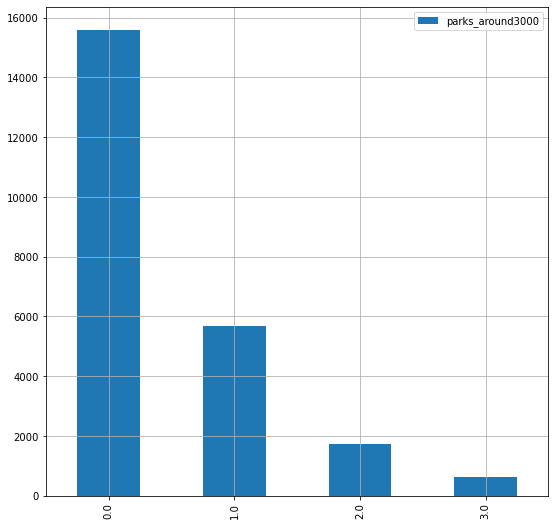

In [18]:
data['parks_around3000'].fillna(0, inplace=True)
check_miss_rate('parks_around3000')
observe_cat_col('parks_around3000')

Таким образом, пропуски в столбце `parks_nearest` можно заполнить специальным значением -1. Это сразу даст понять, что тут был пропуск.

Доля пропусков в столбце 'parks_nearest': 0.00%


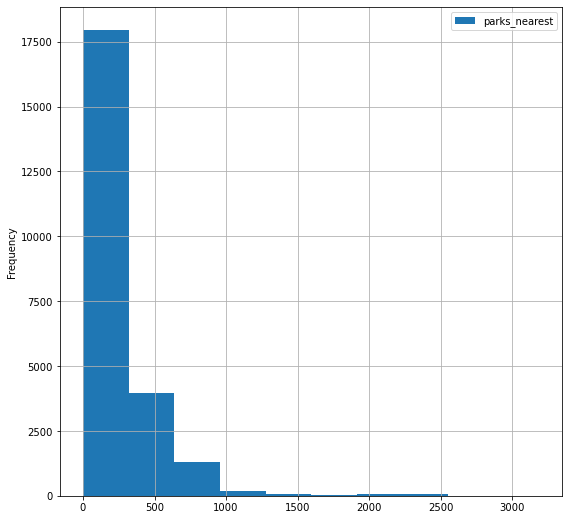

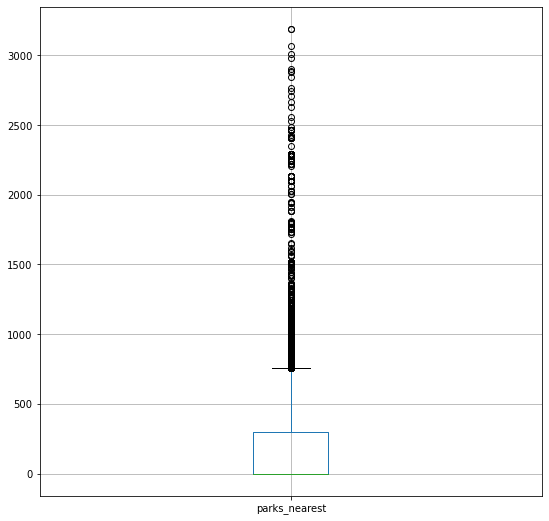

count    23650.000000
mean       166.700761
std        307.191767
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [19]:
data['parks_nearest'].fillna(-1, inplace=True)
check_miss_rate('parks_nearest')
observe_num_col('parks_nearest')

Эти графики не очень информативные, из-за большого количества пропусков. Первый и второй квартили стали равны -1.  

#### ponds_
  
Аналогично паркам.

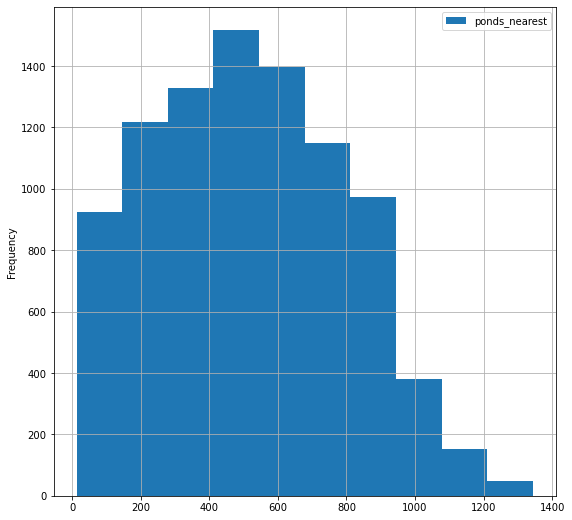

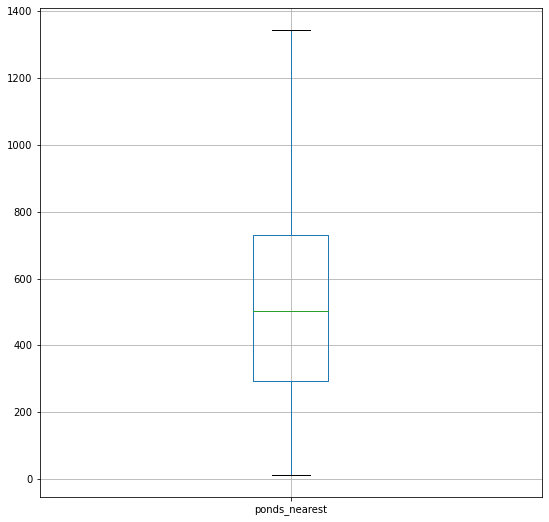

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [20]:
observe_num_col('ponds_nearest')

Выбросов в этом столбце не наблюдается. Минимум также не равен нулю.

0.0    9055
1.0    5702
NaN    5510
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64

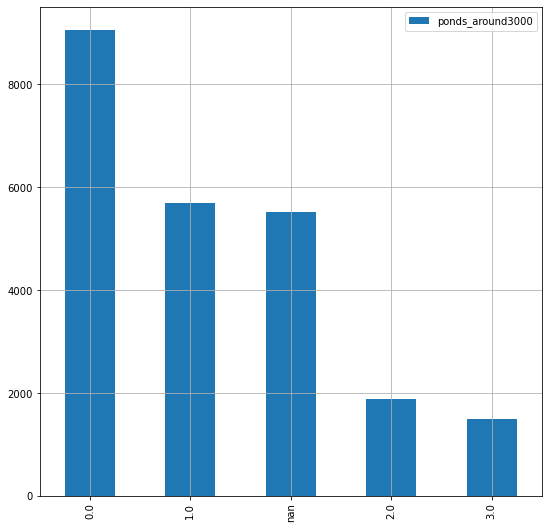

In [21]:
observe_cat_col('ponds_around3000')

In [22]:
create_mode_miss_rate_df('ponds_around3000')

,index,mode,miss_rate
Санкт-Петербург,Санкт-Петербург,0.0,0.003880
посёлок Шушары,посёлок Шушары,0.0,0.009091
Ломоносов,Ломоносов,0.0,0.007519
Колпино,Колпино,0.0,0.002959
поселок Мурино,поселок Мурино,2.0,0.941176
Кронштадт,Кронштадт,2.0,0.010417
Красное Село,Красное Село,0.0,0.011236
посёлок Щеглово,посёлок Щеглово,0.0,0.956522


In [23]:
m = len(
    data[data['locality_name'] == 'поселок Мурино']['ponds_around3000'].isna())

k = len(data[data['locality_name'] == 'Кронштадт']['ponds_around3000'].isna())

print(
    f"Количество домов с пропуском в поле 'ponds_around3000' в поселке Мурино: {m}"
)

print(
    f"Количество домов с пропуском в поле 'ponds_around3000' в Кронштадте: {k}"
)

print(f"Общая длина выборки: {len(data)}")

Количество домов с пропуском в поле 'ponds_around3000' в поселке Мурино: 34
Количество домов с пропуском в поле 'ponds_around3000' в Кронштадте: 96
Общая длина выборки: 23650


Логика выбора занчения для заполнения пропусков аналогична.

Доля пропусков в столбце 'ponds_around3000': 0.00%


0.0    14565
1.0     5702
2.0     1889
3.0     1494
Name: ponds_around3000, dtype: int64

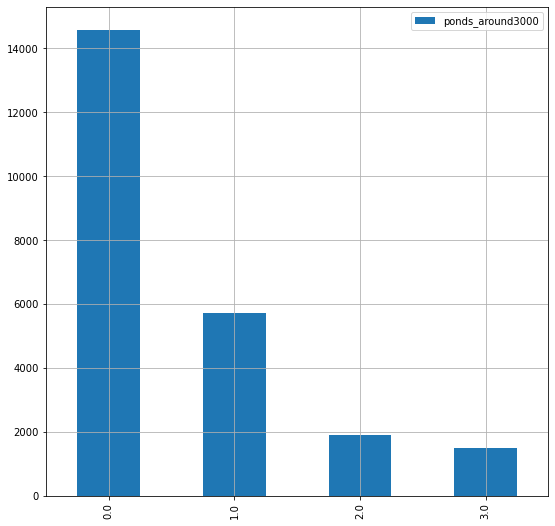

In [24]:
data['ponds_around3000'].fillna(0, inplace=True)
check_miss_rate('ponds_around3000')
observe_cat_col('ponds_around3000')

Доля пропусков в столбце 'ponds_nearest': 0.00%


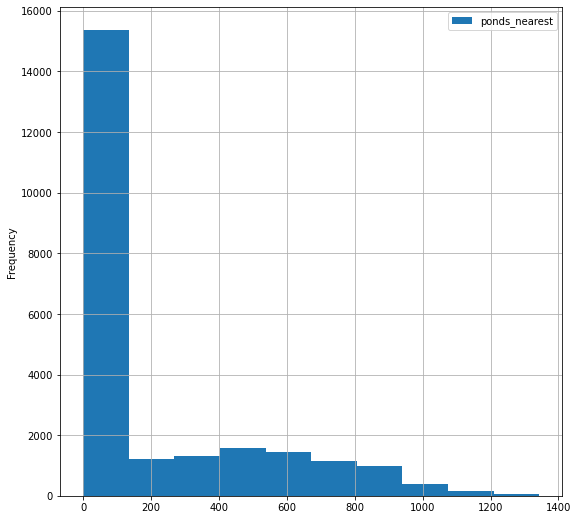

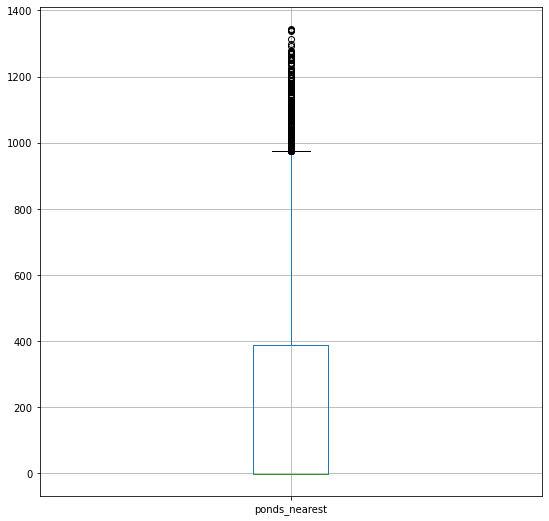

count    23650.000000
mean       198.393615
std        305.605088
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        389.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [25]:
data['ponds_nearest'].fillna(-1, inplace=True)
check_miss_rate('ponds_nearest')
observe_num_col('ponds_nearest')

#### balcony

NaN    11513
1.0     4187
0.0     3725
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

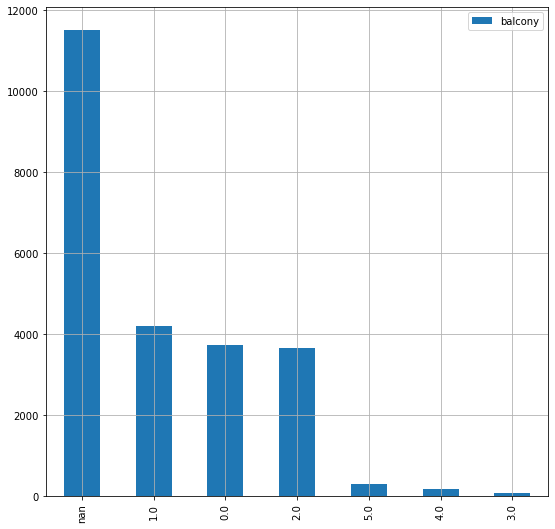

In [26]:
observe_cat_col('balcony')

Наиболее логичная замена - 0. Пропуск означает, что балконов в доме нет.

Доля пропусков в столбце 'balcony': 0.00%


0.0    15238
1.0     4187
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

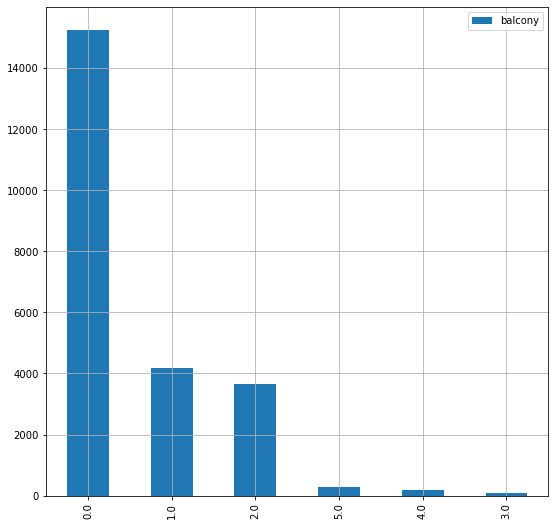

In [27]:
data['balcony'].fillna(0, inplace=True)
check_miss_rate('balcony')
observe_cat_col('balcony')

#### ceiling_height

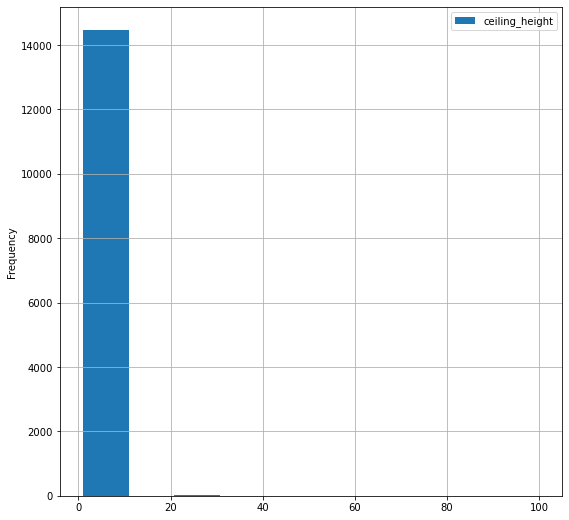

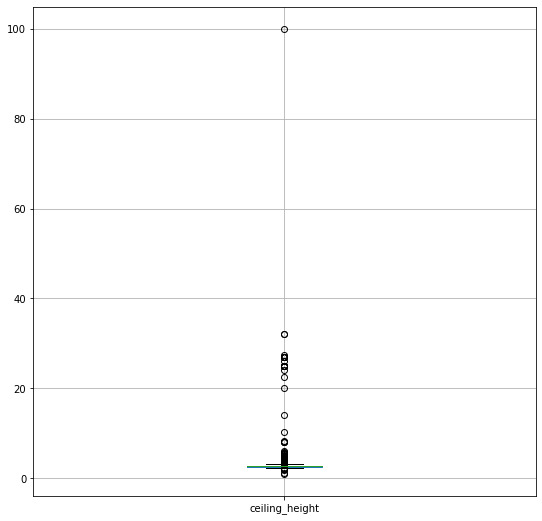

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [28]:
observe_num_col('ceiling_height')

Ничего не понятно. Увеличим разрешение и приблизим в область реальных значений.  
  
В данных есть выбросы - очень высокие потолки вплоть до 100 метров. Точно также наблюдаются помещения с потолком высотой 1 метр.  
Может быть, это ошибка при сборе данных, а, может быть, какие-то специальные помещения.

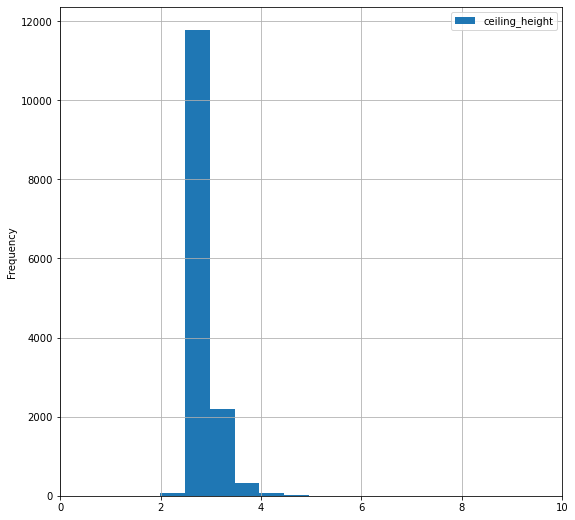

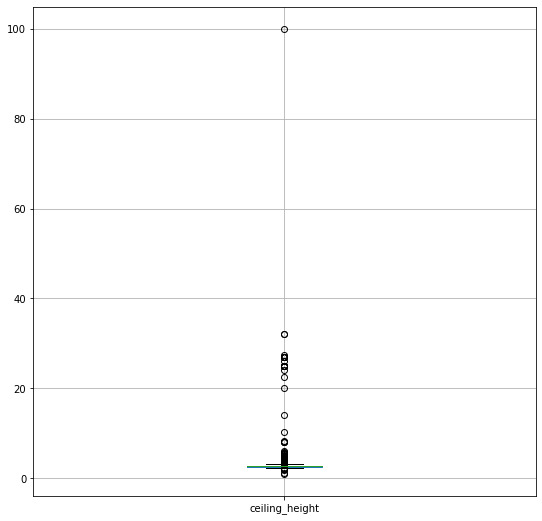

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [29]:
observe_num_col('ceiling_height', xlim=(0, 10), bins=200)

Можно безболезнено заполнить пропуски медианой, потому что, не считая выбросов, данные имеют малый разброс.

Доля пропусков в столбце 'ceiling_height': 0.00%


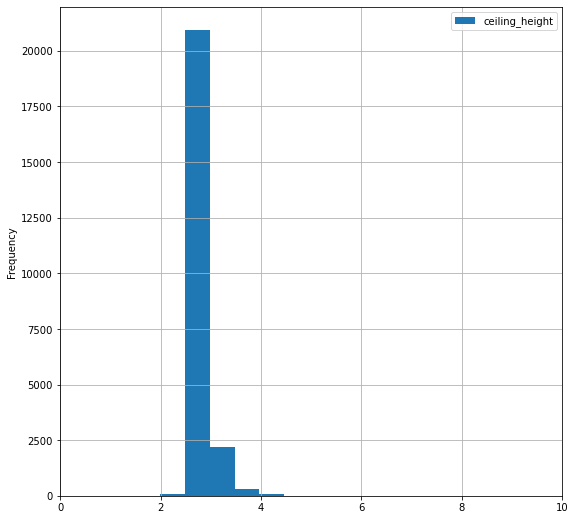

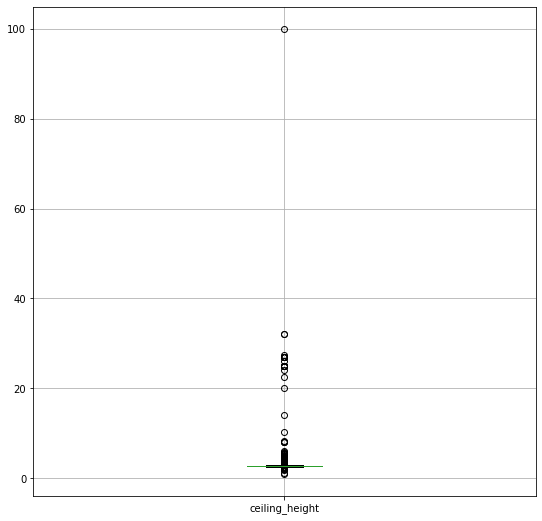

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [30]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
check_miss_rate('ceiling_height')
observe_num_col('ceiling_height', xlim=(0, 10), bins=200)

#### airports_nearest

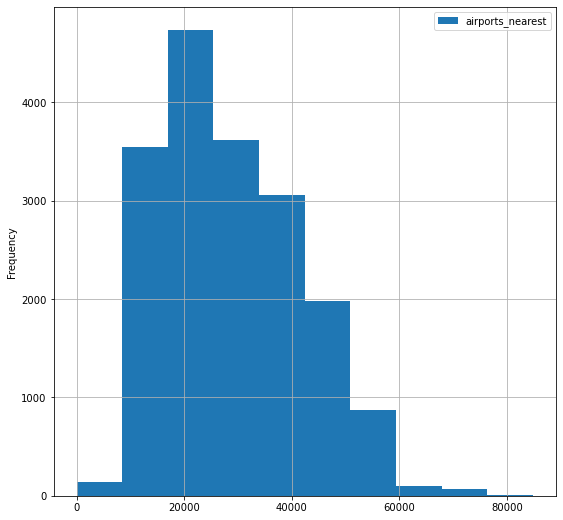

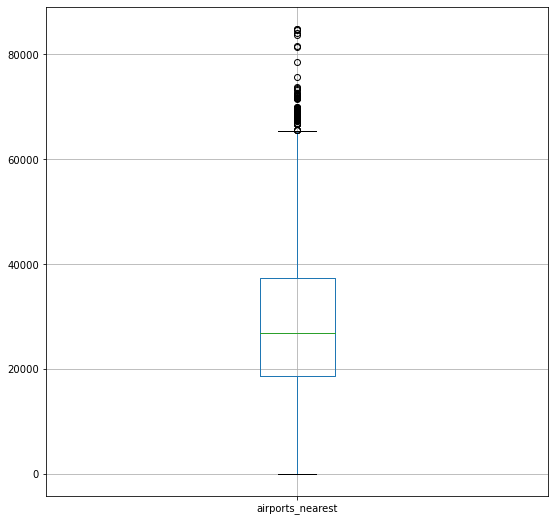

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [31]:
observe_num_col('airports_nearest')

Существуют дома, расстояния от которых до аэропорта равно 0. Весьма странное явление. Возможно, ошибка в данных.  
Есть небольшое количество выбросов.  
Логично будет заполнить пропуски медианным значением по каждому населенному пункту.

In [32]:
fill_by_group('airports_nearest', 'locality_name')
check_miss_rate('airports_nearest')

Доля пропусков в столбце 'airports_nearest': 22.77%


Остались только города, медиана для которых равна `NaN`, иначе говоря для **всех** домов в этих городах значения пропущены.  
Посмотрим, на города, для которых произошло заполнение пропусков.

In [33]:
set(data['locality_name']) - set(
    data[data['airports_nearest'].isna()]['locality_name'])

{'Зеленогорск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Павловск',
 'Петергоф',
 'Пушкин',
 'Санкт-Петербург',
 'Сестрорецк',
 'поселок Лисий Нос',
 'поселок Мурино',
 'посёлок Александровская',
 'посёлок Белоостров',
 'посёлок Левашово',
 'посёлок Лисий Нос',
 'посёлок Металлострой',
 'посёлок Молодёжное',
 'посёлок Парголово',
 'посёлок Песочный',
 'посёлок Петро-Славянка',
 'посёлок Понтонный',
 'посёлок Репино',
 'посёлок Сапёрный',
 'посёлок Стрельна',
 'посёлок Усть-Ижора',
 'посёлок Шушары',
 'посёлок Щеглово'}

Для остальных населенных пунктов восстановить расстояние до ближайшего аэропорта не представляется возможным. Сохраним информацию о том, что пропуск был, заполнив невозможным значением -1.

Доля пропусков в столбце 'airports_nearest': 0.00%


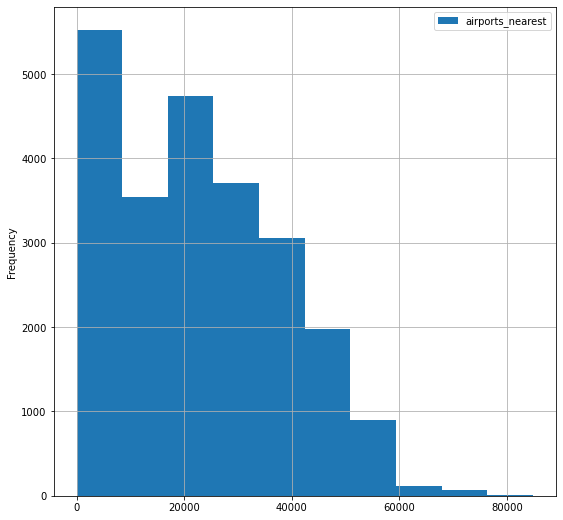

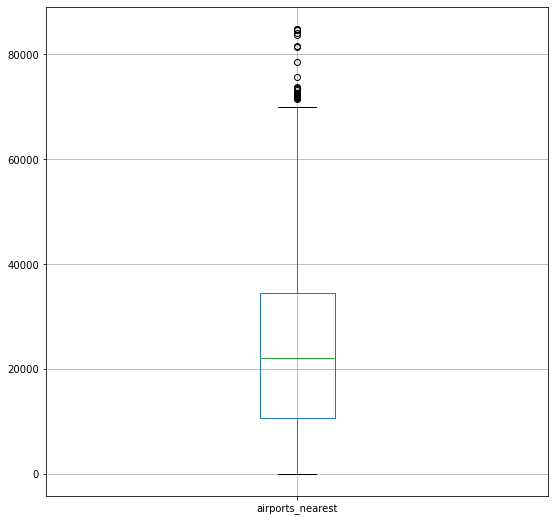

count    23650.000000
mean     22297.824524
std      16456.167397
min         -1.000000
25%      10638.000000
50%      22057.500000
75%      34509.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [34]:
data['airports_nearest'].fillna(-1, inplace=True)
check_miss_rate('airports_nearest')
observe_num_col('airports_nearest')

Данные исказились не так заметно, как при заполнении предыдущих пропусков.

#### cityCenters_nearest

Сначала исправим название столбца.

In [35]:
data.rename({'cityCenters_nearest': 'city_centers_nearest'},
            axis=1,
            inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

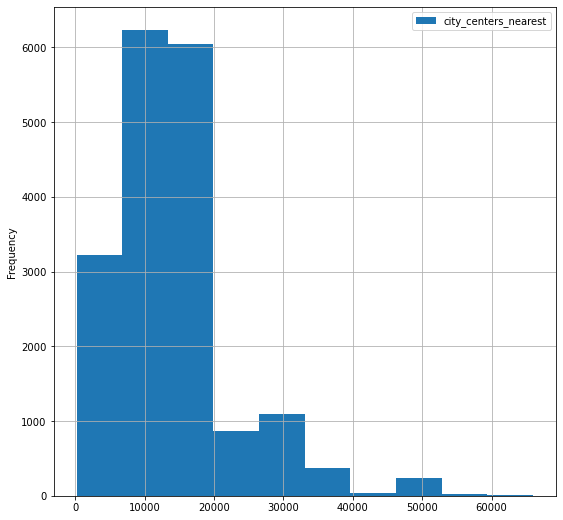

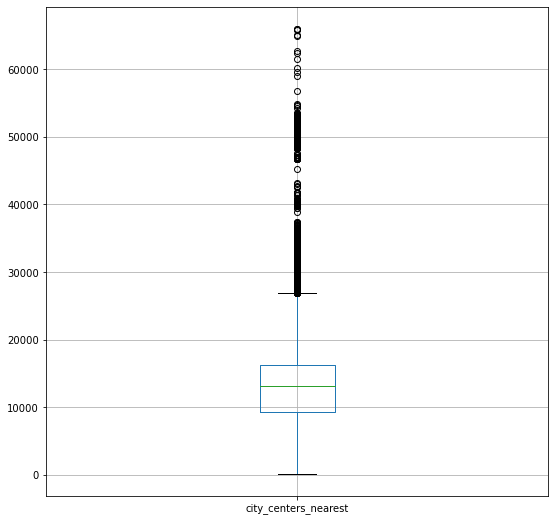

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [36]:
observe_num_col('city_centers_nearest')

Есть выбросы, нет нулевых значений.

Обработаем аналогично аэропортам

In [37]:
fill_by_group('city_centers_nearest', 'locality_name')
check_miss_rate('city_centers_nearest')

Доля пропусков в столбце 'city_centers_nearest': 22.77%


In [38]:
set(data['locality_name']) - set(
    data[data['city_centers_nearest'].isna()]['locality_name'])

{'Зеленогорск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Павловск',
 'Петергоф',
 'Пушкин',
 'Санкт-Петербург',
 'Сестрорецк',
 'поселок Лисий Нос',
 'поселок Мурино',
 'посёлок Александровская',
 'посёлок Белоостров',
 'посёлок Левашово',
 'посёлок Лисий Нос',
 'посёлок Металлострой',
 'посёлок Молодёжное',
 'посёлок Парголово',
 'посёлок Песочный',
 'посёлок Петро-Славянка',
 'посёлок Понтонный',
 'посёлок Репино',
 'посёлок Сапёрный',
 'посёлок Стрельна',
 'посёлок Усть-Ижора',
 'посёлок Шушары',
 'посёлок Щеглово'}

Доля пропусков в столбце 'city_centers_nearest': 0.00%


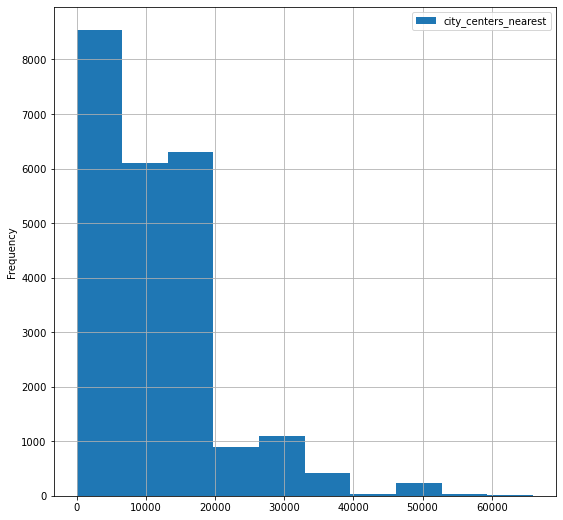

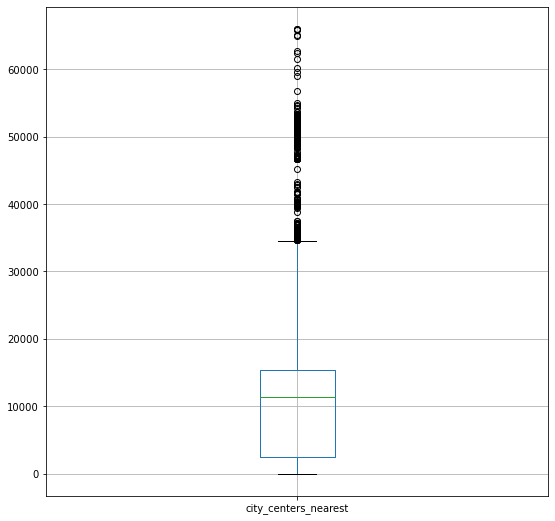

count    23650.000000
mean     10995.481607
std       9648.954747
min         -1.000000
25%       2488.000000
50%      11356.500000
75%      15318.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [39]:
data['city_centers_nearest'].fillna(-1, inplace=True)
check_miss_rate('city_centers_nearest')
observe_num_col('city_centers_nearest')

#### days_exposition

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

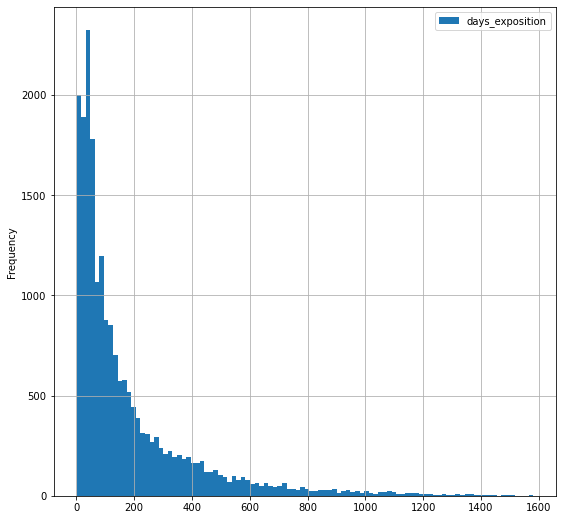

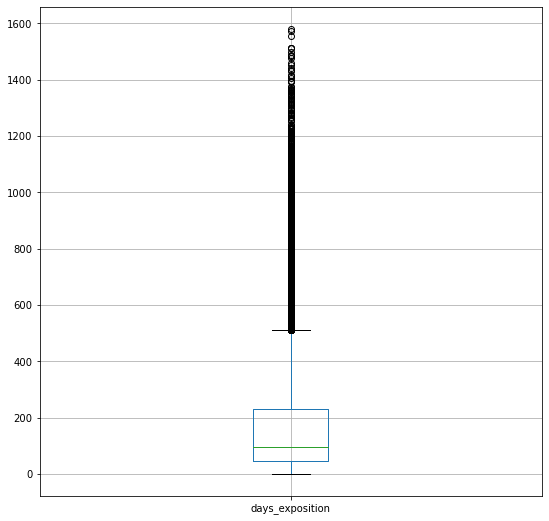

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [40]:
observe_num_col('days_exposition', bins=100)

Этот столбец имеет распределение Пуассона, что вполне соответсвует смыслу.

Запишем медианное и среднее время продажи для будущего анализа.

In [41]:
days_exposition_mean = data['days_exposition'].mean()
days_exposition_median = data['days_exposition'].median()

В датасете существует столбец `first_day_exposition` — дата публикации.

In [42]:
check_miss_rate('first_day_exposition')

Доля пропусков в столбце 'first_day_exposition': 0.00%


Значит **все** объявления имеют дату публикации. Так как есть пропуски в столбце с общей длительностью размещения объявления, предположим, что они означают, что объявление висит до сих пор.  
Исходя из этой логики заполним пропуски.

In [43]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')

# time_delta - время в днях между текущим днем и днем публикации
data['time_delta'] = data['first_day_exposition'].apply(
    lambda x: (datetime.today() - x).total_seconds() / 60 / 60 / 24)

data['days_exposition'] = data['days_exposition'].fillna(data['time_delta'])
check_miss_rate('days_exposition')

Доля пропусков в столбце 'days_exposition': 0.00%


Избавимся от временной переменной `time_delta`.

In [44]:
data = data.drop('time_delta', axis=1)

#### _area	

Площадь кухни и жилая площадь - важнейшие признаки в этом датасете, потому что они напрямую влияют на стоимость жилья. Пропуски в них хорошо заполняются методом `KNNImputer`.  
На обучение ему нужно подать только признаки, имеющие отношение к самой квартире как к постройке. Нам не важно ее географическое положение, не важно когда вывешено объявление и так далее. Также нельзя использовать признак `last_price`, чтобы не было утечки данных.  
Таким образом, выпишем признаки, имеющие отношение к площади квартиры:  
1) `is_apartment`   
2) `total_area`  
3) `rooms`  
4) `celling_height`  
5) `living_area`  
6) `kitchen_area`  
7) `balcony`  
8) `studio`  
9) `open_plan`
  
Для простоты решения будем использовать только численные из них.  
Убедимся, что в срезе данных по этим признакам нет пропусков нигде кроме площадей.

In [45]:
show_missing()

,missing_rate,col_type
kitchen_area,0.095941,float64
living_area,0.080254,float64
floors_total,0.003594,float64


In [46]:
knn_imp = KNNImputer(weights='distance')
flat_feat = [
    'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area',
    'balcony'
]

data[flat_feat] = knn_imp.fit_transform(data[flat_feat])

check_miss_rate('living_area')
check_miss_rate('kitchen_area')
show_missing()

Доля пропусков в столбце 'living_area': 0.00%
Доля пропусков в столбце 'kitchen_area': 0.00%


,missing_rate,col_type
floors_total,0.003594,float64


#### floors_total

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
NaN       85
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

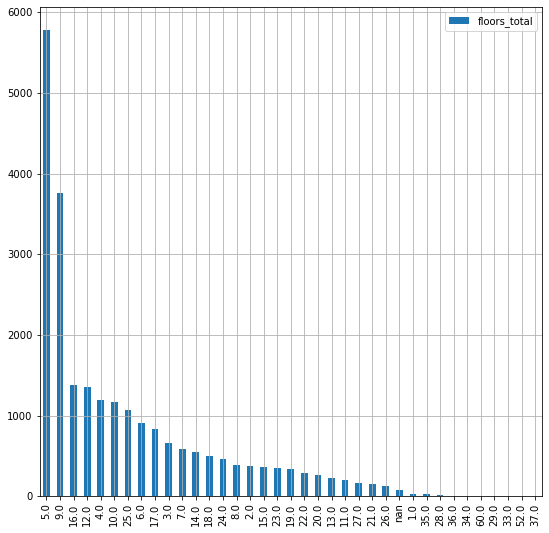

In [47]:
observe_cat_col('floors_total')

In [48]:
data[data['floors_total'].isna()].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10983,6,4670000.0,37.80,2019-03-13,1.0,2.65,NaN,16.9,14,Other,...,9.500000,0.0,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,1185.469283
11129,10,3128418.0,34.53,2018-10-01,1.0,2.65,NaN,11.0,13,Other,...,9.682998,0.0,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,145.000000
2392,7,5395770.0,53.00,2017-06-29,2.0,2.65,NaN,29.0,22,Other,...,9.000000,0.0,Санкт-Петербург,43074.0,10820.0,0.0,-1.0,0.0,-1.0,48.000000
7508,5,6800000.0,45.50,2018-01-22,1.0,2.65,NaN,21.6,8,Other,...,12.600000,0.0,Санкт-Петербург,43058.0,13495.0,1.0,508.0,0.0,-1.0,26.000000
10662,12,4400000.0,35.00,2017-06-15,1.0,2.65,NaN,16.0,8,Other,...,10.700000,0.0,Санкт-Петербург,9412.0,13723.0,2.0,676.0,1.0,1158.0,533.000000


Заполним пропуски медианой по городу.

Доля пропусков в столбце 'floors_total': 0.00%


5.0     5776
9.0     3829
16.0    1376
12.0    1362
4.0     1194
10.0    1174
25.0    1075
6.0      913
17.0     833
3.0      667
7.0      589
14.0     553
18.0     507
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     341
22.0     286
20.0     273
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
60.0       1
34.0       1
29.0       1
14.5       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

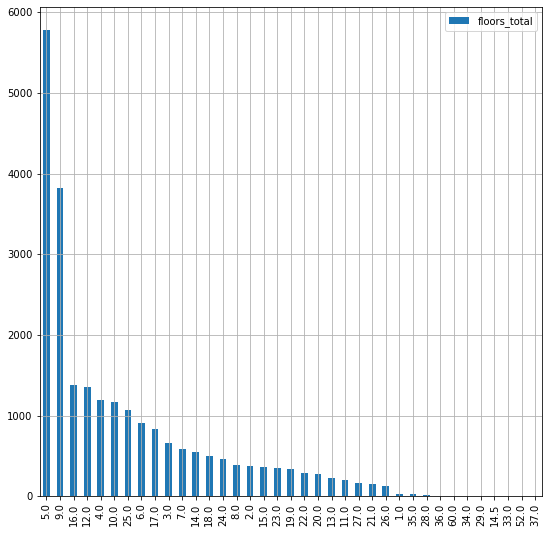

In [49]:
fill_by_group('floors_total', 'locality_name')

check_miss_rate('floors_total')
observe_cat_col('floors_total')

### Оптимизация памяти, изменение типов данных

Изменим вручную некоторые типы данных исходя из смысла столбца.  
Количество чего угодно - это целое число. Приведем к типу `int`.

In [50]:
data['rooms'] = data['rooms'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Изменим типы данных, чтобы уменьшить использование памяти.

In [51]:
display(data.info())

data = downcast()

display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int32         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   is_apartment          23650 non-null  category      
 1   locality_name         23650 non-null  category      
 2   last_price            23650 non-null  float32       
 3   total_area            23650 non-null  float32       
 4   ceiling_height        23650 non-null  float32       
 5   living_area           23650 non-null  float32       
 6   kitchen_area          23650 non-null  float32       
 7   airports_nearest      23650 non-null  float32       
 8   city_centers_nearest  23650 non-null  float32       
 9   parks_nearest         23650 non-null  float32       
 10  ponds_nearest         23650 non-null  float32       
 11  days_exposition       23650 non-null  float32       
 12  total_images          23650 non-null  uint8         
 13  rooms           

None

In [52]:
data[data.duplicated()]

,is_apartment,locality_name,last_price,total_area,ceiling_height,living_area,kitchen_area,airports_nearest,city_centers_nearest,parks_nearest,...,total_images,rooms,floors_total,floor,balcony,parks_around3000,ponds_around3000,first_day_exposition,studio,open_plan


### Результаты и выводы

**РЕЗУЛЬТАТЫ:**  
Все пропуски в данных устранены.  
Дубликатов в данных нет.  
Устранена проблема с именами столбцов.  
Использование памяти сократилось в 2 раза.  
Данные готовы к анализу.  
  
**ВЫВОДЫ:**  
В данных было много пропусков, многие из них образовались из-за того, что просто нечем было заполнить поля. Например, в городе нет ни одного парка или пруда, в таком случае логично оставить поле с расстоянием до парка или пруда пустым, количество парков и прудов также можно оставить пустым, но лучше заполнить нулем. Зато в данных не было дублей. Благодаря применению разных методов заполнения пропусков удалось сохранить почти все данные.

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [53]:
data['sqr_m_price'] = data['last_price'] / data['total_area']
data[['last_price', 'total_area', 'sqr_m_price']].head()

,last_price,total_area,sqr_m_price
0,13000000.0,108.000000,120370.367188
1,3350000.0,40.400002,82920.789062
2,5196000.0,56.000000,92785.710938
3,64900000.0,159.000000,408176.093750
4,10000000.0,100.000000,100000.000000


### День недели, месяц и год публикации

In [54]:
data['exposition_day'] = data['first_day_exposition'].apply(
    lambda x: x.weekday()).map({
        0: 'Mon',
        1: 'Tue',
        2: 'Wed',
        3: 'Thu',
        4: 'Fri',
        5: 'Sat',
        6: 'Sun'
    }).astype('category')
data['exposition_day'].head()

0    Thu
1    Tue
2    Thu
3    Fri
4    Tue
Name: exposition_day, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [55]:
data['exposition_month'] = data['first_day_exposition'].apply(
    lambda x: x.month).astype('category')
data['exposition_month'].head()

0     3
1    12
2     8
3     7
4     6
Name: exposition_month, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [56]:
data['exposition_year'] = data['first_day_exposition'].apply(
    lambda x: x.year).astype('category')
data['exposition_year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: exposition_year, dtype: category
Categories (6, int64): [2014, 2015, 2016, 2017, 2018, 2019]

### Тип этажа

In [57]:
def get_floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'


data['floor_type'] = data.apply(get_floor_type, axis=1)
data['floor_type'].head()

0    Другой
1    Первый
2    Другой
3    Другой
4    Другой
Name: floor_type, dtype: object

### Соотношение площадей

In [58]:
data['living_by_all'] = data['living_area'] / data['total_area']
data[['living_area', 'total_area', 'living_by_all']].head()

,living_area,total_area,living_by_all
0,51.000000,108.000000,0.472222
1,18.600000,40.400002,0.460396
2,34.299999,56.000000,0.612500
3,84.384773,159.000000,0.530722
4,32.000000,100.000000,0.320000


In [59]:
data['kitchen_by_all'] = data['kitchen_area'] / data['total_area']
data[['kitchen_area', 'total_area', 'kitchen_by_all']].head()

,kitchen_area,total_area,kitchen_by_all
0,25.000000,108.000000,0.231481
1,11.000000,40.400002,0.272277
2,8.300000,56.000000,0.148214
3,21.656199,159.000000,0.136202
4,41.000000,100.000000,0.410000


### Вывод

Данные собирались в течение 6 лет с 2014 до 2019. Объявления размещались в любой день недели, в том числе и в выходные. Также объявления размещались каждый месяц.

## Исследовательский анализ данных

### Изучение признаков `total_area`, `last_price`, `rooms`, `ceiling_height`

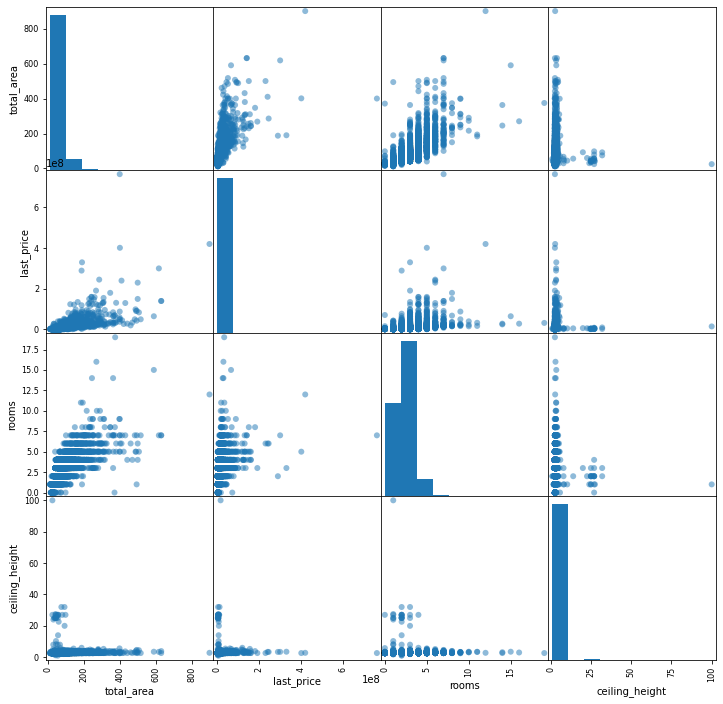

In [60]:
pd.plotting.scatter_matrix(
    data[['total_area', 'last_price', 'rooms', 'ceiling_height']],
    figsize=(12, 12),
    marker='o');

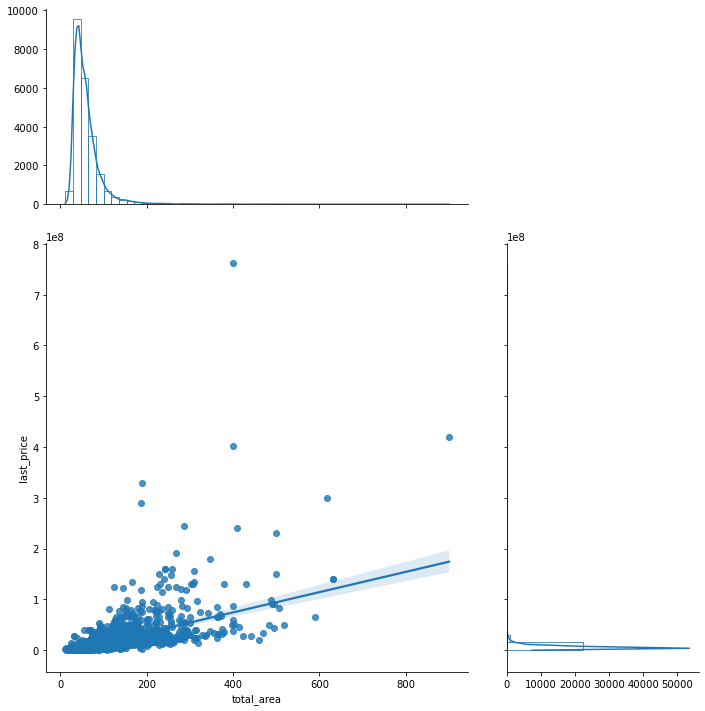

In [61]:
sns.jointplot(data=data,
              y='last_price',
              x='total_area',
              kind='reg',
              marginal_kws=dict(bins=50, fill=False),
              marginal_ticks=True,
              height=10,
              ratio=2);

**ВЫВОД:**  
В данных наблюдается большое количевтво выбросов во всех исследуемых столбцах. Необходимо от них избавиться, прежде чем получится сделать какие-то разумные выводы.  
В нулевом приближении зависимости в датасете правильные: с ростом площади растет цена, с ростом количества комнат растет площади и цена, высота потолков не зависит от исследуемых параметров. Я предполагаю, что может быть зависимоть высоты потолка от количества этажей, от года постройки.

#### Гистограммы

Для более подробного рассмотрения увеличим масштаб и разрешение для каждой гистограммы.

`total_area`

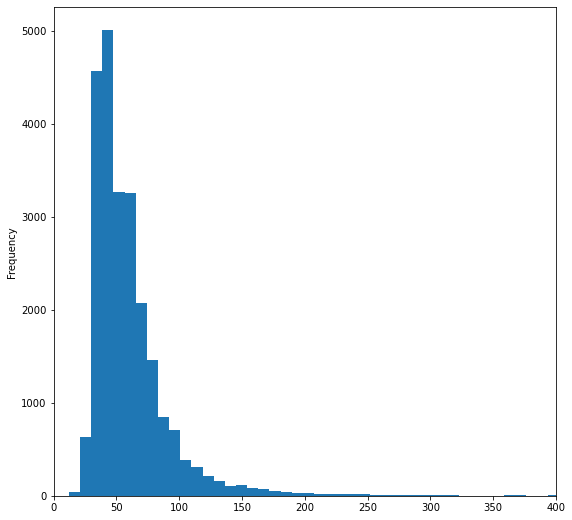

In [62]:
data['total_area'].plot(kind='hist', xlim=(0, 400), bins=100);

Ожидается нормальное распределение. Ввиду наличия выбросов наблюдается тяжелый правй хвост. При решении задачи прогноза стоимости квартиры нужно будет применить преобразование: логорифм, степенное или Бокс-Кокс.

`last_price`

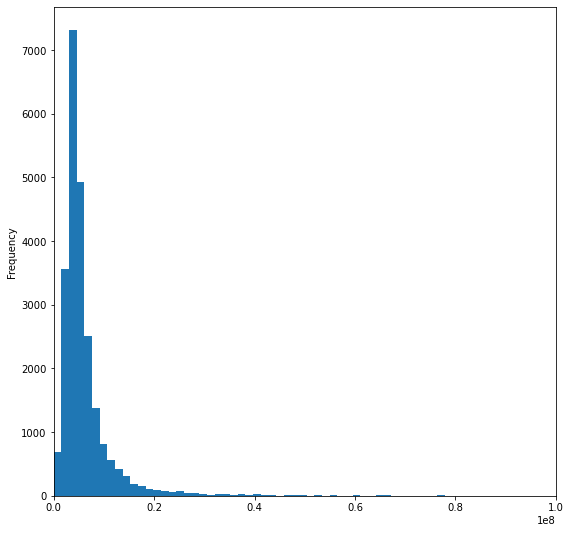

In [63]:
data['last_price'].plot(kind='hist', xlim=(0, 100000000), bins=500);

Аналогично площади ожидается нормальное распределение. Опять же из-за выбросов - длинный правый хвост. Нужно преобразовать при построении модели.

`rooms`

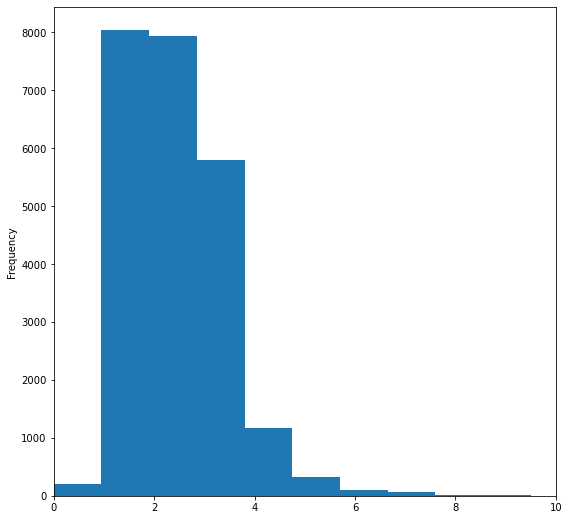

In [64]:
data['rooms'].plot(kind='hist', xlim=(0, 10), bins=20);

Интуитивно ожидается, что все данные будут находиться в пределах от 1 до 5 комнат. Больше - уже экзотика. За исключением выбросов такую картирну мы и наблюдаем.

`ceiling_height`

<AxesSubplot:ylabel='Frequency'>

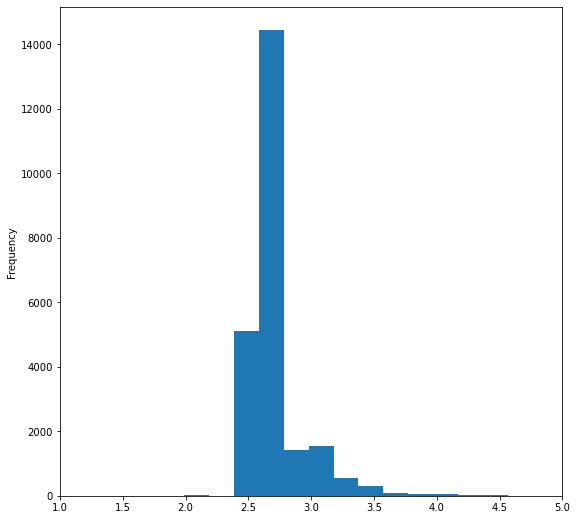

In [65]:
data['ceiling_height'].plot(kind='hist', bins=500, xlim=(1, 5))

Высота потолков от 2,5 до 3 метров - отражает действительность.

### Изучение времени продажи квартиры

In [66]:
data[['days_exposition', 'first_day_exposition']].head()

,days_exposition,first_day_exposition
0,1191.469238,2019-03-07
1,81.000000,2018-12-04
2,558.000000,2015-08-20
3,424.000000,2015-07-24
4,121.000000,2018-06-19


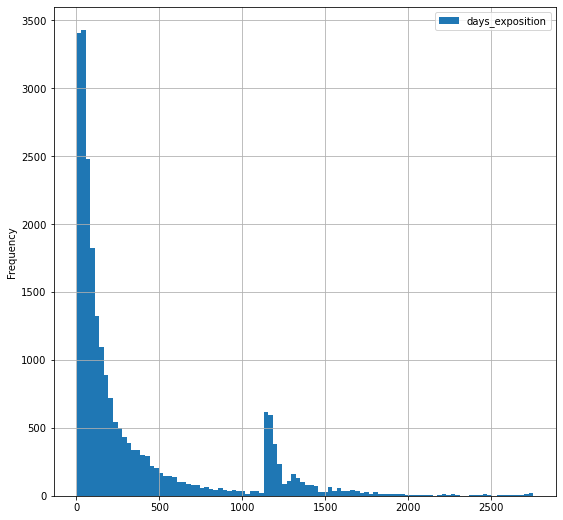

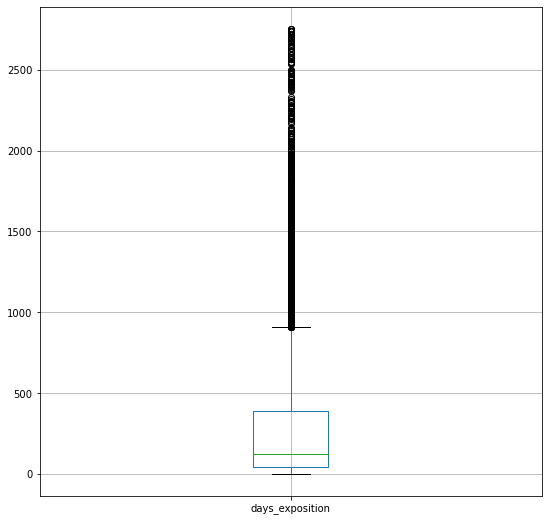

count    23650.000000
mean       338.260010
std        462.639130
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       2752.469238
Name: days_exposition, dtype: float64

In [67]:
observe_num_col('days_exposition', bins=100)

К пуассоновскому распределению времени продажи прибавилось пуассоновское распределение, которое описывает, на самом деле, день размещения объявления. Получилось так из-за того что пропуски заполняются количетсвом дней от размещения до дня выполнения кода.

In [68]:
print(
    f"Те помещения, которые были проданы, продавались в среднем за {round(days_exposition_mean)} день."
)
print(
    f"Медианное время продажи проданных помещений: {round(days_exposition_median)} дней"
)

Те помещения, которые были проданы, продавались в среднем за 181 день.
Медианное время продажи проданных помещений: 95 дней


Предположительно **13,4%** помещений не было продано на момент сбора данных. Среднее и медианное время продажи помещения с учетом непроданных:  
1) Среднее 337 дней (на момент 08.06.22)  
2) Медианное 124 дня  
  
Если квартира продалась менее чем за **45 дней**, это быстрее чем 75% остальных квартир, можно считать, что продажа прошла быстро.  
Если же объявление находится на площадке более **390 дней**, дольше чем 75% всех квартир, считаем, что продажа затянулась

### Удаление выбросов

Далее по заданию требуется провести анализ по следующим параметрам:  
1) Цена  
2) Площадь  
3) Число комнат  
4) Удаленность от центра  
  
Поэтому будем устранять выбросы только в этих столбцах.

In [69]:
cols_to_analyze = ['last_price', 'total_area', 'rooms', 'city_centers_nearest']

#### Межквартильное расстояние

Одним из способов борьбы с выбросами является удаление данных, которые не находятся в диапазоне  
[(Q1 - 1.5 * IQR); (Q3 + 1.5 * IQR)]  
(см. рисунок)

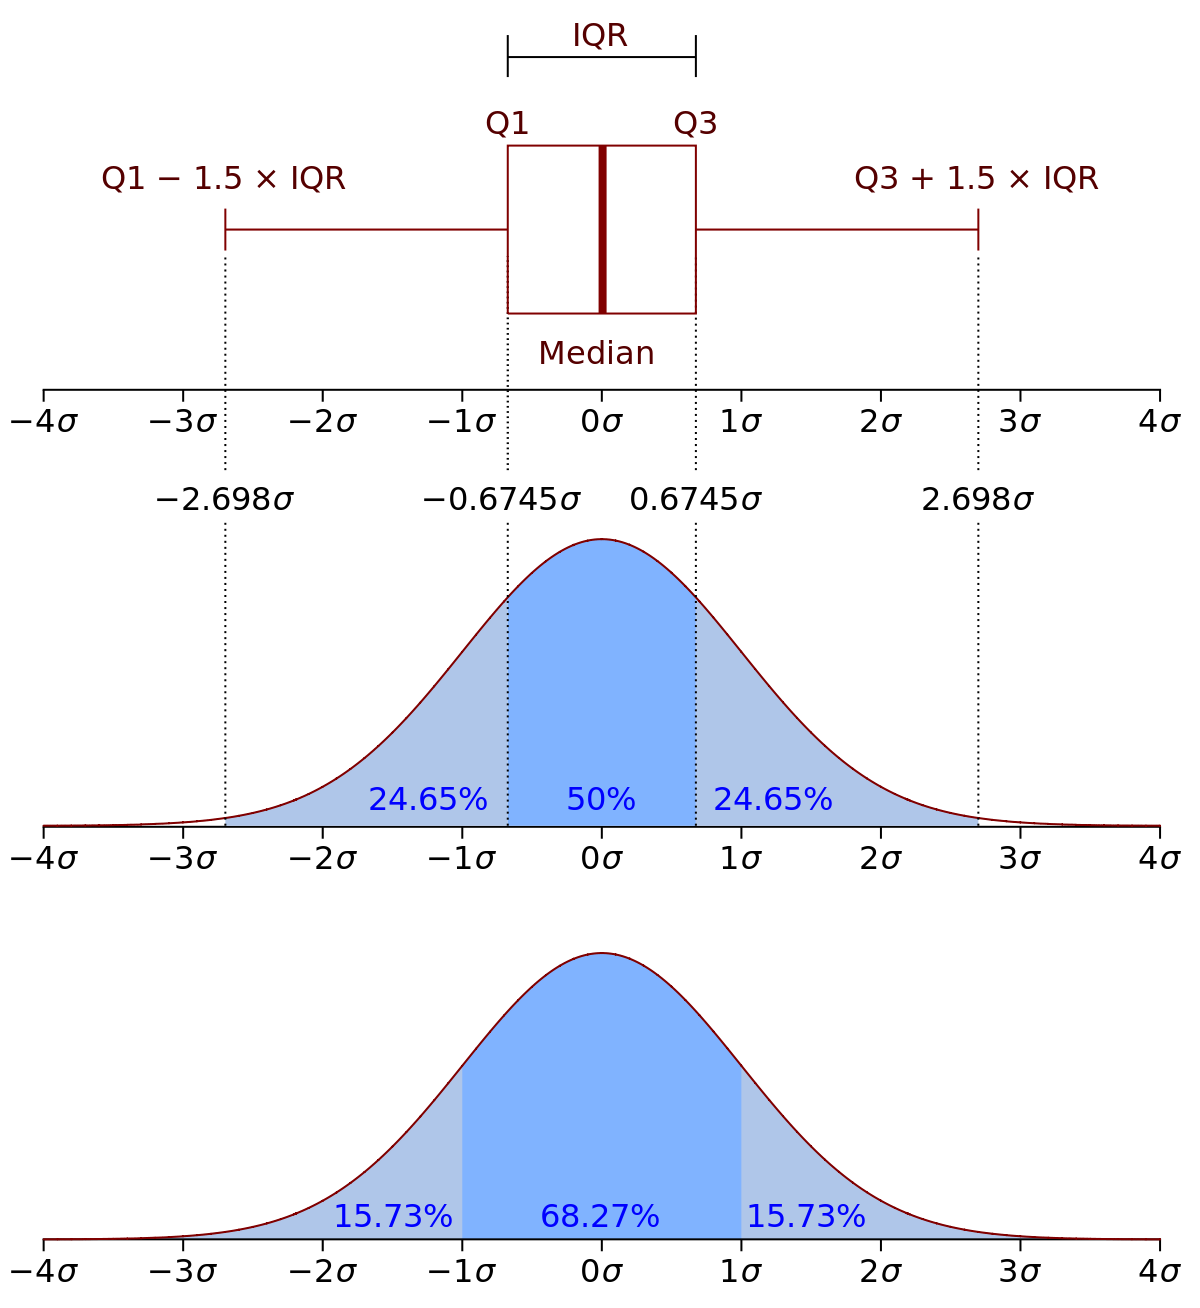

In [70]:
def delete_outliers(col_name, df=data):
    """
    Удаляет строки, в которых значение col_name лежит вне диапазона 1,5 межквартильных размаха
    """
    x_25 = np.percentile(df[col_name], 25)
    x_75 = np.percentile(df[col_name], 75)

    low = x_25 - 1.5 * (x_75 - x_25)
    high = x_75 + 1.5 * (x_75 - x_25)

    res = df[(df[col_name] > low) & (df[col_name] < high)]

    print(f'{col_name}: Удалено {1 - len(res) / len(df):.2%} данных')
    return res

In [71]:
data_wo_outliers = data.copy()

for col in cols_to_analyze:
    data_wo_outliers = delete_outliers(col, data_wo_outliers)

data_wo_outliers.reset_index(drop=True, inplace=True)
print(f'Суммарно удалено {1 - len(data_wo_outliers) / len(data):.2%} данных')

last_price: Удалено 8.69% данных
total_area: Удалено 2.08% данных
rooms: Удалено 0.01% данных
city_centers_nearest: Удалено 1.40% данных
Суммарно удалено 11.86% данных


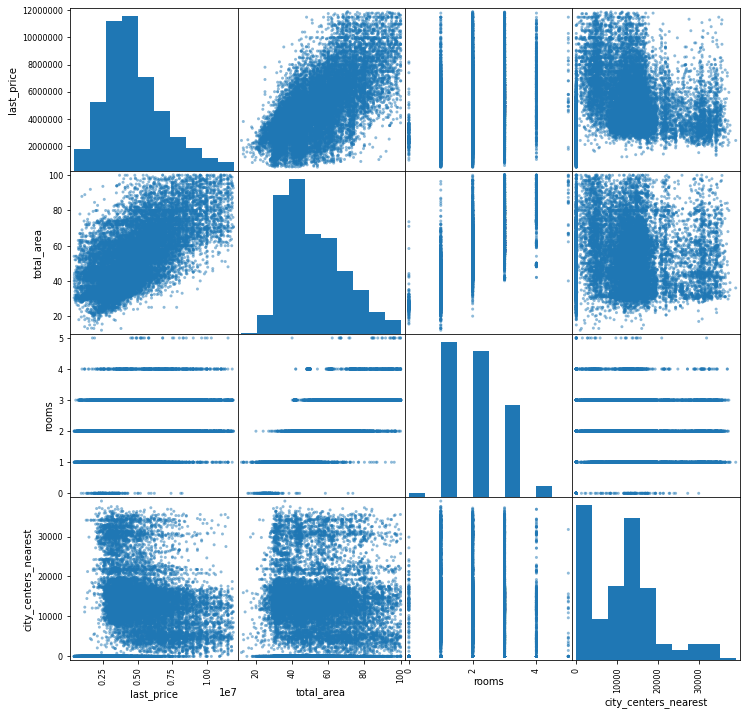

In [72]:
pd.plotting.scatter_matrix(data_wo_outliers[cols_to_analyze], figsize=(12, 12));

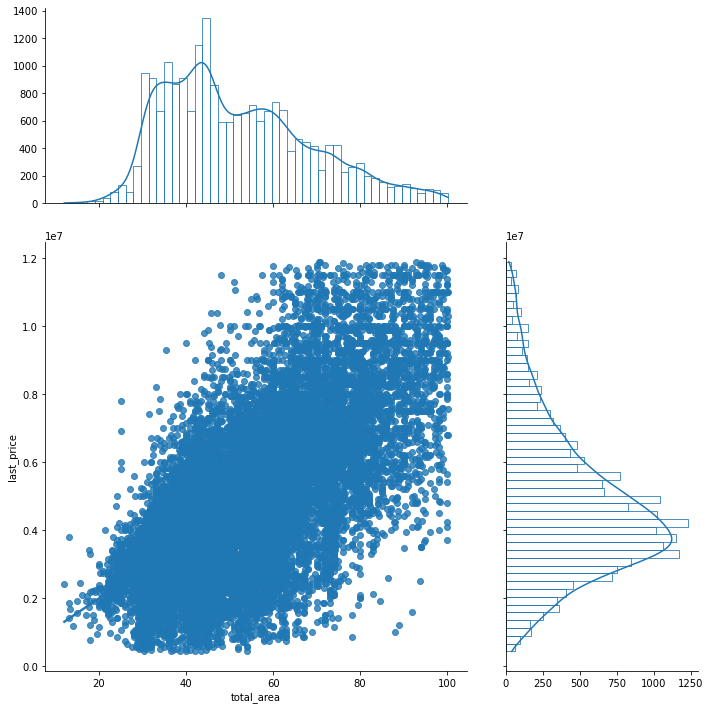

In [73]:
sns.jointplot(data=data_wo_outliers,
              y='last_price',
              x='total_area',
              kind='reg',
              marginal_kws=dict(bins=50, fill=False),
              marginal_ticks=True,
              height=10,
              ratio=2);

**ВЫВОД:**  
На графике заметно, как часть данных просто отрезали и отбросили.  
Этот метод плохо поборолся с выбросами в столбце `city_centers_nearest`.  
Это своего рода решение "в лоб". Работает хорошо и быстро, но мне кажется такой подход не самым "умным" и современным, с некоторыми выбросами он не справляется.  
Рассмотрим другие способы борьбы с выбросами на основе методов машинного обучения.

#### IsolationForest

Метод `IsolationForest` разбивает выборку так, чтобы изолировать объект от остальных. Совокупность этих разбиений представляет собой дерево, в котором количество разбиений является глубиной дерева.  
Для того, чтобы изолировать выброс необходимо куда меньшее количество разбиений. Таким образом, строится большое количество разных случайных деревьев, и для каждого объекта подсчитывается средняя глубина дерева, которое нужно, чтобы его изолировать. Объекты с малым значением помечаются как выбросы. 

In [74]:
isol_forest = IsolationForest(random_state=45, n_jobs=-1)

outliers_1 = isol_forest.fit_predict(data[cols_to_analyze])
data_outliers_1 = data[outliers_1 == -1]

data_wo_outliers_1 = data.drop(data_outliers_1.index).reset_index(drop=True)

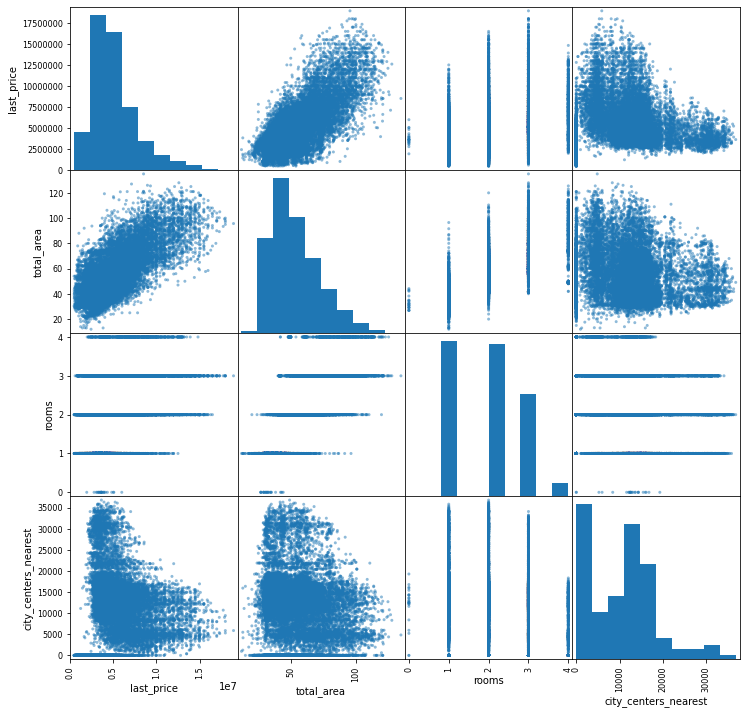

In [75]:
pd.plotting.scatter_matrix(data_wo_outliers_1[cols_to_analyze], figsize=(12, 12));

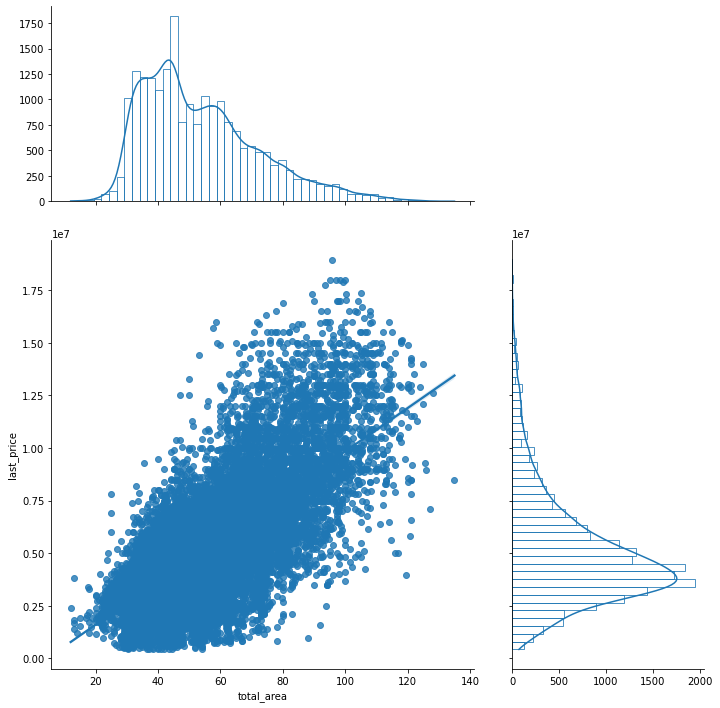

In [76]:
sns.jointplot(data=data_wo_outliers_1,
              y='last_price',
              x='total_area',
              kind='reg',
              marginal_kws=dict(bins=50, fill=False),
              marginal_ticks=True,
              height=10,
              ratio=2);

Больше похоже на степенную зависимость. Нужно будет учесть это при построении модели прогнозирования цены.

In [77]:
print(f'Суммарно удалено {1 - len(data_wo_outliers_1) / len(data):.2%} данных')

Суммарно удалено 11.00% данных


**ВЫВОД:**  
Удалено приблизительно такое же количество данных.  
Хорошо очистились данные в столбце `city_centers_nearest`, особенно это заметно на диаграмме `city_centers_nearest`-`total_area`.  
Самые главные, по моему мнениею, параметры в этой задаче: `total_area` и`last_price` очистилось от выбросов, но элементы в области `last_price` > 1,2 * 10^7 и `total_area` > 100 не были удалены. Они располагаются довольно плотно, значит не являются аномальными значениями или ошибкой в данных.

#### LOF

Метод `LocalOutFactor` основан на методе ближайших соседей.  
Для каждого элемента подсчитывается локальная плотность, основанная на расстоянии (по умолчанию Евклидово расстояние) до k (по умолчанию k=20) ближайших соседей. Плотность для каждого образца сравнивается с плотностью для других объектов выборки. Меньшая плотность говорит о том, что объект является выбросом.

In [78]:
lof = LocalOutlierFactor()

outliers_2 = lof.fit_predict(data[cols_to_analyze])
data_outliers_2 = data[outliers_2 == -1]

data_wo_outliers_2 = data.drop(data_outliers_2.index).reset_index(drop=True)

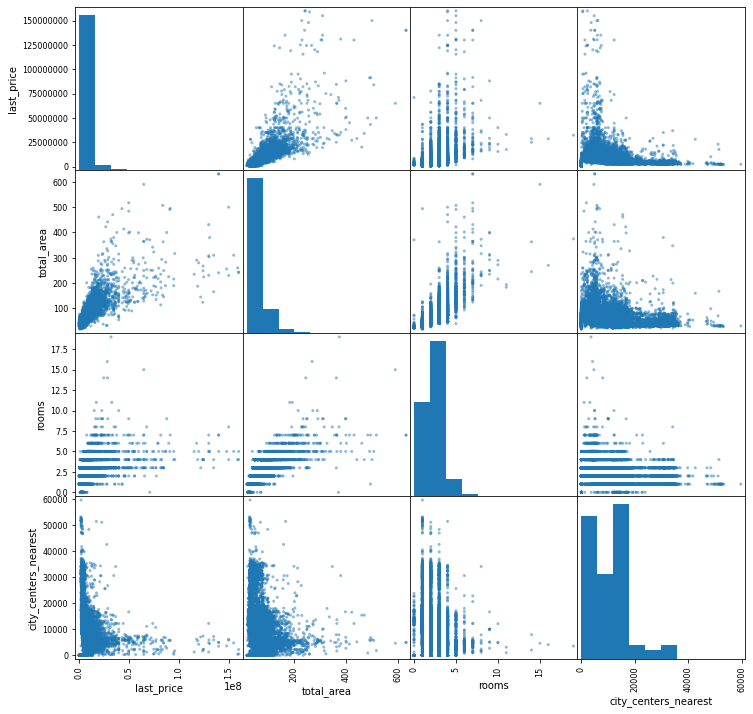

In [79]:
pd.plotting.scatter_matrix(data_wo_outliers_2[cols_to_analyze], figsize=(12, 12));

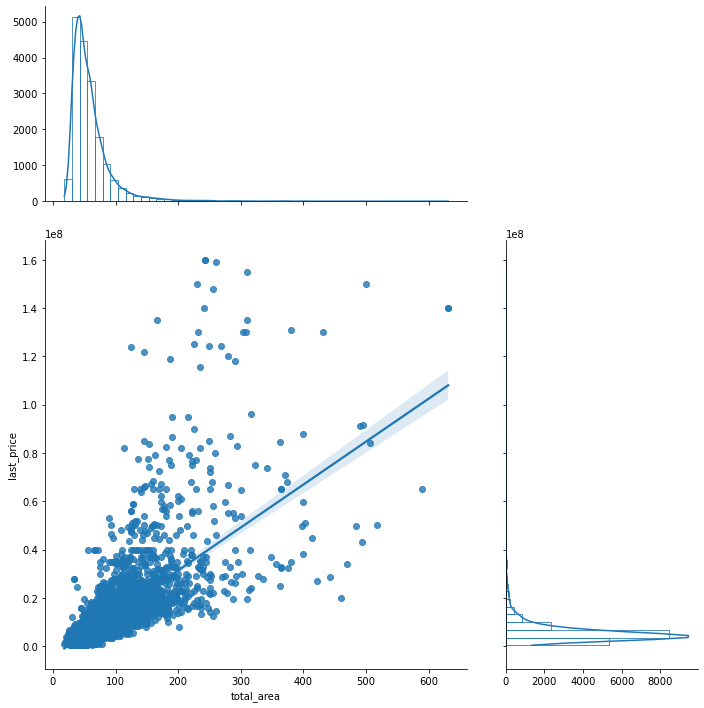

In [80]:
sns.jointplot(data=data_wo_outliers_2,
              y='last_price',
              x='total_area',
              kind='reg',
              marginal_kws=dict(bins=50, fill=False),
              marginal_ticks=True,
              height=10,
              ratio=2);

In [81]:
print(f'Суммарно удалено {1 - len(data_wo_outliers_2) / len(data):.2%} данных')

Суммарно удалено 22.53% данных


**ВЫВОД:**  
Удалено значительно больше данных, чем при обработке предыдущим методом.  
Заметно, что этот метод не удалил некоторые кластеры объектов-выбросов, например, с высокой ценой и средней площадью (`last_price` > 1 * 10^8). Это объясняется принципом работы этого метода. Так, например, остались объекты с аномально большим расстоянием до центра (> 3000), большим количеством комнат (> 5), площадью (> 200) и так далее.  

**ВЫВОД:**  
Таким образом, наиболее подходящим методом устранения выбросов является `IsolationForest`.  

Далее будем работать с данными обработанными этим способом, сделаем визуализацию, показывающую какие элементы были удалены.

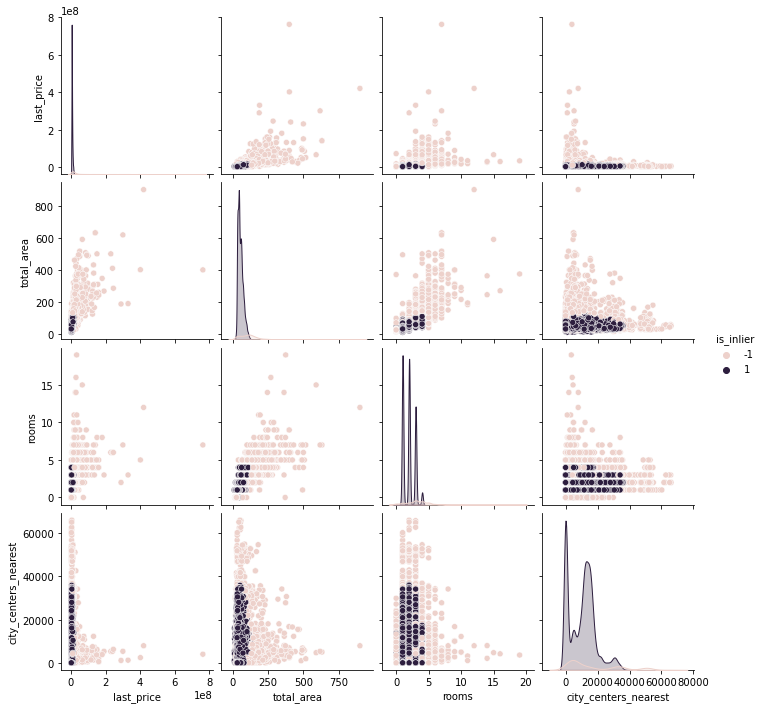

In [82]:
data['is_inlier'] = outliers_1
sns.pairplot(
    data=data[cols_to_analyze + ['is_inlier']],
    hue='is_inlier');

На этой диаграмме кажется, что удаено существенное количество данных. На самом деле это не так.  
Фиолетоые точки - 89% данных.  
Розовые - 11% данных.  
Выбросы, как и полагается, распределяются не плотно.  

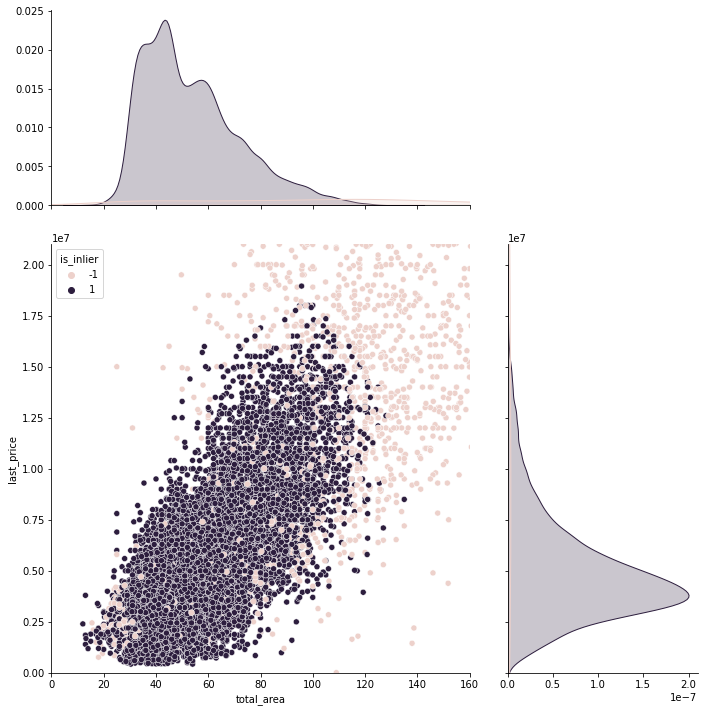

In [83]:
sns.jointplot(data=data,
              y='last_price',
              x='total_area',
              hue='is_inlier',
              marginal_ticks=True,
              height=10,
              ratio=2,
              xlim=(0, 160),
              ylim=(0, 21000000));

Избавимся от временного столбца `is_inlier`.

In [84]:
data.drop(['is_inlier'], axis=1, inplace=True)

### Влияние на стоимость

#### Влияние площади, кол-ва комнат, расстояния до центра

Рассчитаем коэффициент корреляции Пирсона для всех признаков. Визуализируем при помощи тепловой карты.  
Чем больше по модулю коэф. корреляции, тем большая линейная зависимость между признаками наблюдается. Отрицательный коэф. говорит об обратной зависимости, положительный - о прямой, коэф. равный 0 говорит о том, что признаки линейно не зависят друг от друга (но может быть другая зависимость).

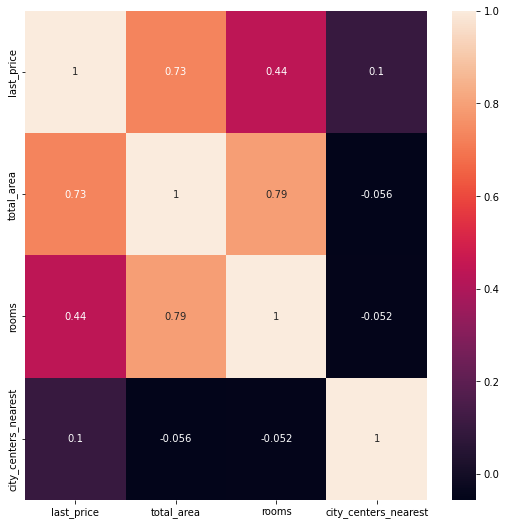

In [85]:
sns.heatmap(data_wo_outliers_1[cols_to_analyze].corr(), annot=True);

**ВЫВОД:**  
Наблюдается пярмая зависимость между ценой и общей площадью, что соответствует действительности.  
Также сильно (но меньше, чем площадь) влияет на цену количество комнат, это также соответствует моему представлению об образовании цены на квартиру.  
На первый взгляд достаточно контринтуитивный результат получен для расстояния до центра города. Выявлена очень сабая прямая зависимость.  
Обратимся к парной диаграмме рассеяния в пункте *4.3.2*. Заметим, что зависимость цены от расстояния до центра скорее напоминает 1/х. Таким образом зависимость нелинейная, следовательно коэффициент Пирсона для ее оценки не подходит. Далее рассмотрим зависимость цены от 1/`city_centers_nearest`, чтобы проверить гипотезу.  
В остальном получившеяся тепловая карта вполне отражает реальные законы природы. Чем больше комнат, тем больше площадь. Расстояние от центра никак не зависит ни от количества комнат, ни от площади квартиры.

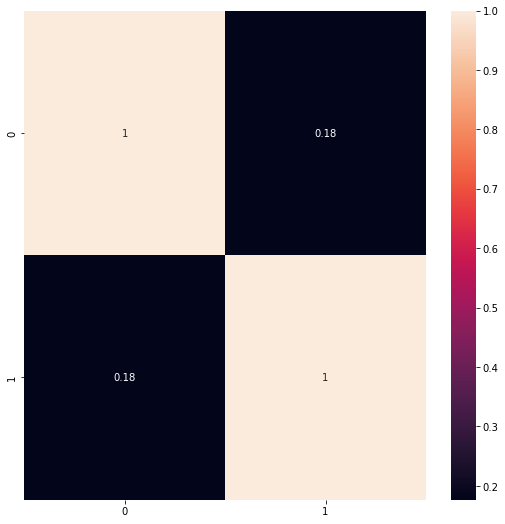

In [86]:
sns.heatmap(np.corrcoef(data['last_price'], 1/data['city_centers_nearest']), annot=True);

Действительно, коэффициент корреляции оказался больше, что говорит о большей зависимости.  
Исключим из рассмотрения объекты, для которых значение `city_centers_nearest` изначально было пропущено (ранее я его заполнил значением -1)

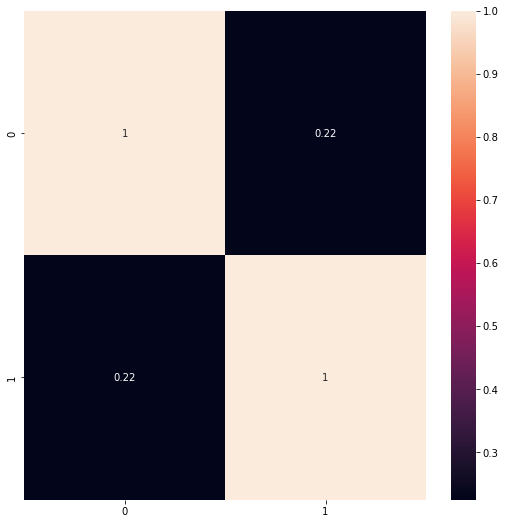

In [87]:
sns.heatmap(np.corrcoef(
    data[data['city_centers_nearest'] != -1]['last_price'],
    1 / data[data['city_centers_nearest'] != -1]['city_centers_nearest']),
            annot=True);

Коэффициент оказался еще выше.  
Гипотеза подтвердилась. Цена на квартиру убывает по гиперболе с ростом расстояния до центра.

#### Влияние этажа, дня, месяца и года размещения

In [88]:
def show_mean_by_droup(group_col_name, agg_col_name='last_price', aggf='mean', df=data_outliers_1):
    grouped_data = df.groupby(group_col_name)[agg_col_name].agg(aggf).sort_values(ascending=False)
    display(grouped_data)
    sns.barplot(y=agg_col_name, x=group_col_name, data=df, order=grouped_data.index)
    plt.xticks(rotation=45)
    plt.show()

floor_type
Последний    23749862.0
Другой       18312100.0
Первый       10648439.0
Name: last_price, dtype: float32

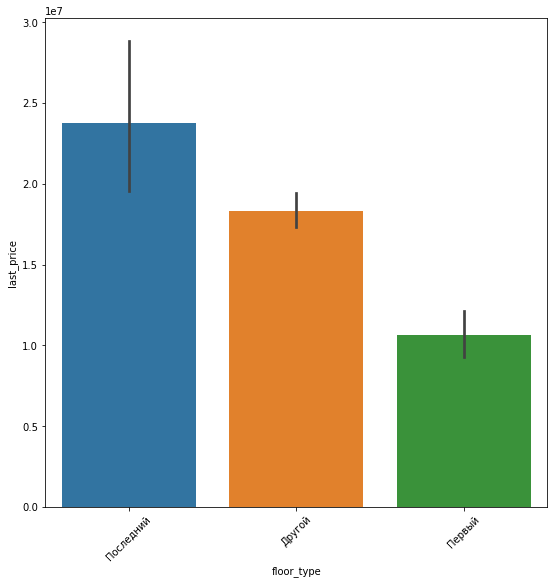

exposition_day
Sat    23916368.0
Wed    18694188.0
Mon    18219066.0
Thu    18166390.0
Fri    17425234.0
Tue    17407938.0
Sun    17261084.0
Name: last_price, dtype: float32

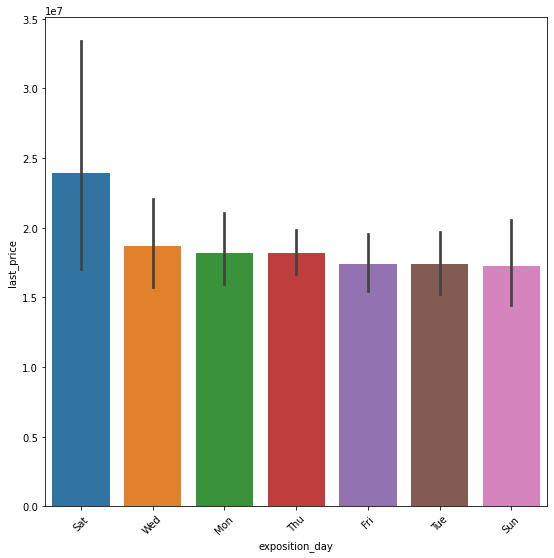

exposition_month
12    23054518.0
4     20199854.0
1     18939130.0
9     18933726.0
5     18889942.0
7     18797020.0
6     18546120.0
8     18298132.0
2     17783632.0
10    17019104.0
3     16786682.0
11    16101065.0
Name: last_price, dtype: float32

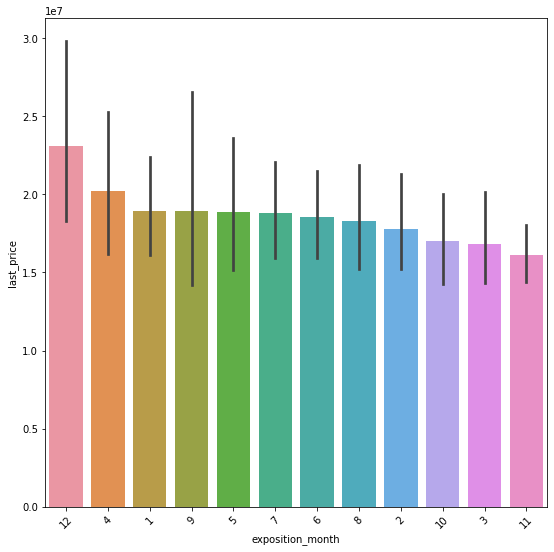

exposition_year
2014    24504156.0
2015    24331438.0
2016    20260018.0
2019    19386046.0
2017    19104792.0
2018    14906211.0
Name: last_price, dtype: float32

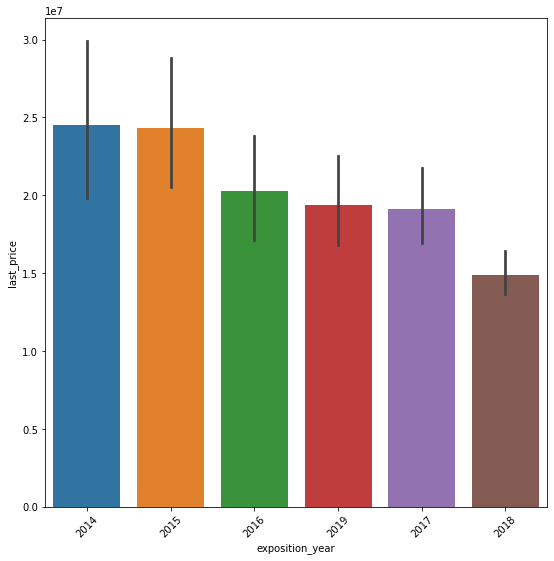

In [89]:
for col in ['floor_type', 'exposition_day', 'exposition_month', 'exposition_year']:
    show_mean_by_droup(col)

**ВЫВОД:**  
1) В среднем квартиры на *последнем* этаже дороже квартир на *первом* более чем в 2 раза. Квартиры на *другом* этаже дороже, квартир на *первом* и дешевле квартир на *последнем*.  
  
2) Квартиры, размещенные в *субботу*, имеют заметно большую цену, чем все остальные. Квартиры, размещенные в первой половине  недели (с *полнедельника* по *среду*) приблизительно равны по цене между собой и дороже квартир, которые размещены во второй половине недели (*четверг, пятница и воскресенье*).  
  
3) Наиболее дорогие квартиры продаются в *декабре* и *апреле*, самые дешевые - в *ноябре* и *марте*. Что интересно, ведь эти месяцы идут друг за другом (*ноябрь*-*декабрь*, *март*-*апрель*). В *сентябре* наблюдается очень большой разброс цен, максимум превышает *апрельские* цены и почти сравнивается с *декабрьскими*, а минимум меньше *ноябрьского*.  
  
4) Самые высокие цены на недвижимость были в *2014* и *2015* году, самые низкие - в *2018*. Снижение цены между объявлениями *2015* и *2016* годов составляет около 4 млн, аналогичное падение было между *2017* и *2018*. Интересно, что в *2019* году цены вернулись обратно на уровень *2016*-*2017* годов.

### Средняя цена квадратного метра по населенным пунктам

locality_name
Санкт-Петербург      107692.882812
Пушкин                99111.500000
деревня Кудрово       92151.835938
посёлок Парголово     90636.851562
посёлок Мурино        85120.476562
посёлок Шушары        78445.960938
Колпино               76421.125000
Гатчина               68664.039062
Всеволожск            67156.507812
Выборг                58221.726562
Name: sqr_m_price, dtype: float32

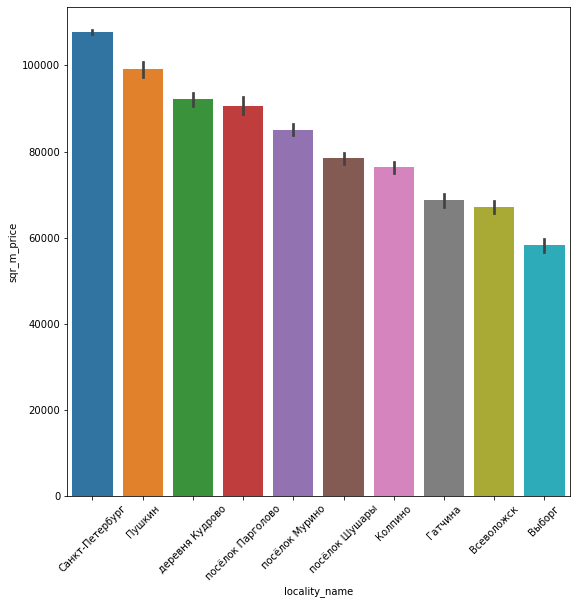

In [90]:
top_10 = list(data['locality_name'].value_counts().index[:10])

#Костыль
data_wo_outliers_1['locality_name'] = data_wo_outliers_1['locality_name'].astype('str')

show_mean_by_droup('locality_name', 'sqr_m_price', df=data_wo_outliers_1.query('locality_name in @top_10'))

**ВЫВОД:**  
Самая высокая стоимость жилья в Санкт-Петербурге (весьма ожидаемо). Самая низкая - в Выборге, почти в два раза ниже, чем в СПб.

### Цена за километр до центра

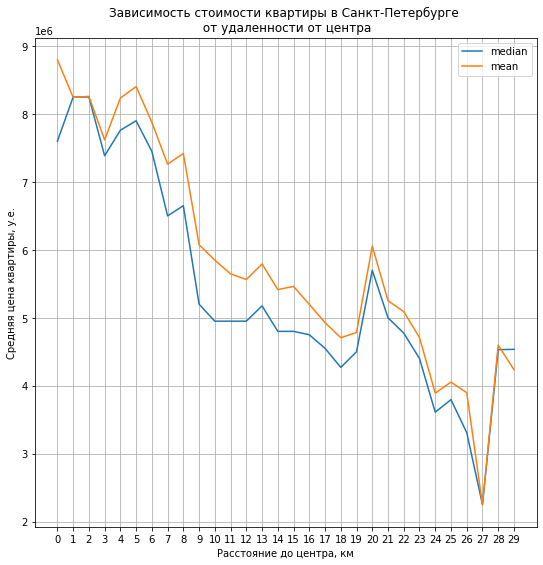

In [91]:
data_spb = data_wo_outliers_1.query('locality_name == "Санкт-Петербург"')

data_spb['city_centers_nearest_km'] = round(data_spb['city_centers_nearest'] / 1000)

plt.plot(data_spb.groupby('city_centers_nearest_km')['last_price'].median().index,
         data_spb.groupby('city_centers_nearest_km')['last_price'].median(), label='median')

plt.plot(data_spb.groupby('city_centers_nearest_km')['last_price'].mean().index,
         data_spb.groupby('city_centers_nearest_km')['last_price'].mean(), label='mean')

plt.xticks(range(30))
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена квартиры, у.е.')
plt.title('Зависимость стоимости квартиры в Санкт-Петербурге \n от удаленности от центра')
plt.legend()
plt.grid()

Самый резкий скачок вниз наблюдается между 7 и 8 км.  
Примем за центральную зону - окружность радиусом 7 км.

### Анализ центрального сегмента

In [92]:
data_spb_center = data_spb.query('city_centers_nearest_km <= 7')

Ранее в столбце `ceiling_height` не удалялись выбросы.  
В ходе выполнения работы был проведен ряд экспериментов, по результатам которого стало ясно, что наилучшим способом удаления выбросов в этом столбце является метод на основе межквартильного расстояния.

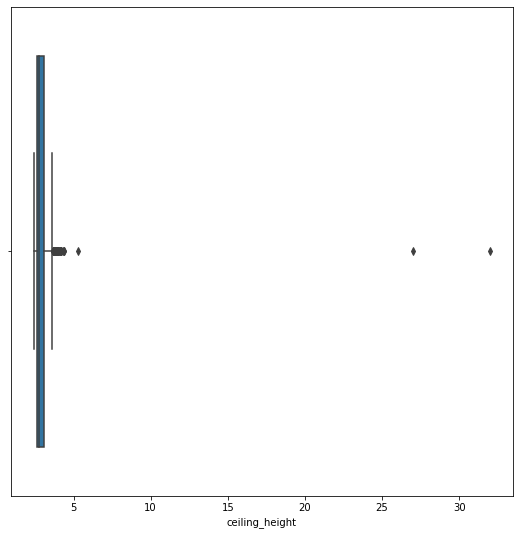

ceiling_height: Удалено 2.78% данных


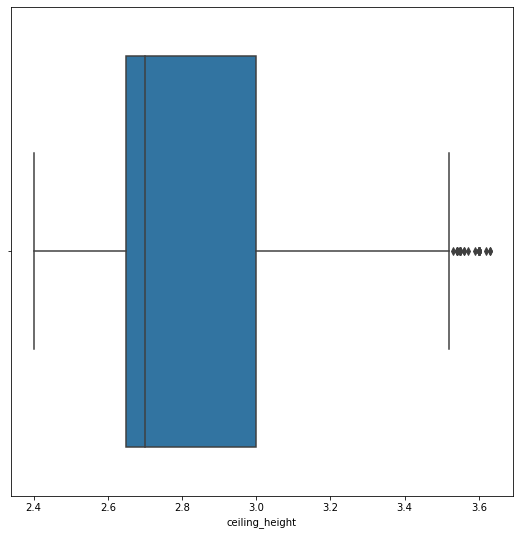

In [93]:
sns.boxplot(data_spb_center['ceiling_height'])
plt.show()

data_spb_center = delete_outliers('ceiling_height', df=data_spb_center)

sns.boxplot(data_spb_center['ceiling_height'])
plt.show()

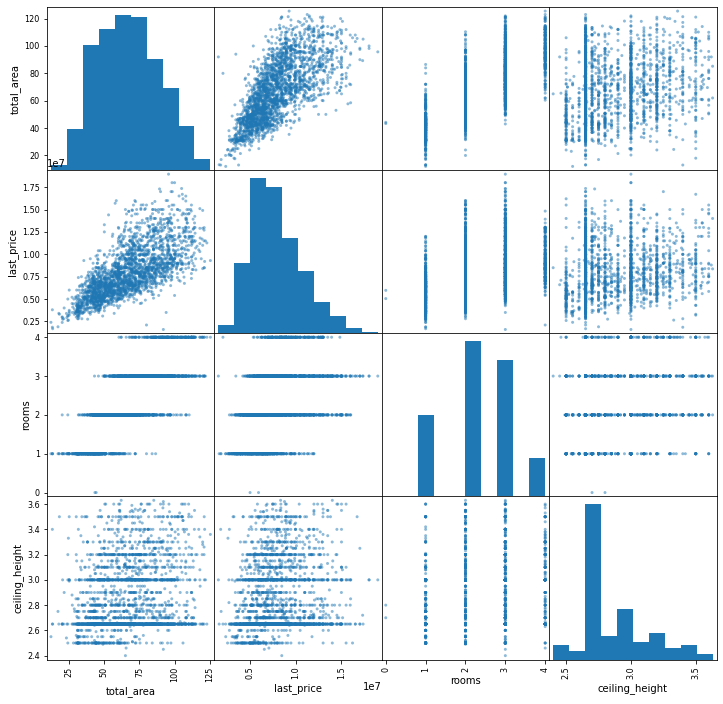

In [94]:
pd.plotting.scatter_matrix(
    data_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']],
    figsize=(12, 12));

1) Диаграмма `last_price`-`total_area` имеет такой же характер, что и во всем датасете (см. попарную диаграмму рассеяния из пункта *4.3.2*.  
2) Аналогичная ситуация с количеством комнат - от 0 до 4.  
3) Высота потолков лежит в диапазоне от 2,5 до 3,5 м. Для полного датасета наблюдается то же самое (см. соответствующую гистограмму в пункте *4.1.1*.
  
Таким образом, квартиры в центре Санкт-Петербурга ... (такие же как везде, сформулировать)

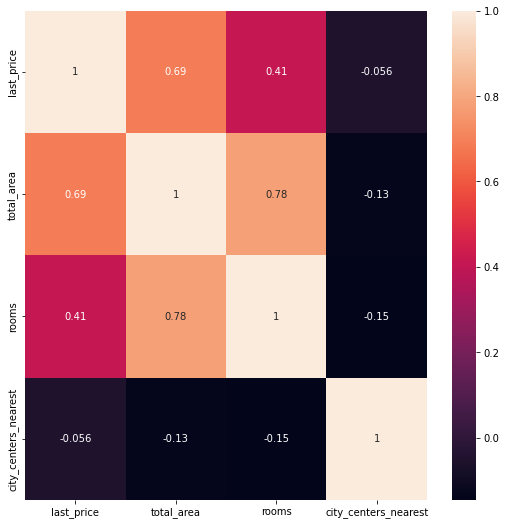

In [95]:
sns.heatmap(data_spb_center[cols_to_analyze].corr(), annot=True);

Цена прямопропорциональна площади и количеству комнат - никаких отличий от общей выборки.  
Цена не зависит от расстояния до центра. Проверим 1/х.

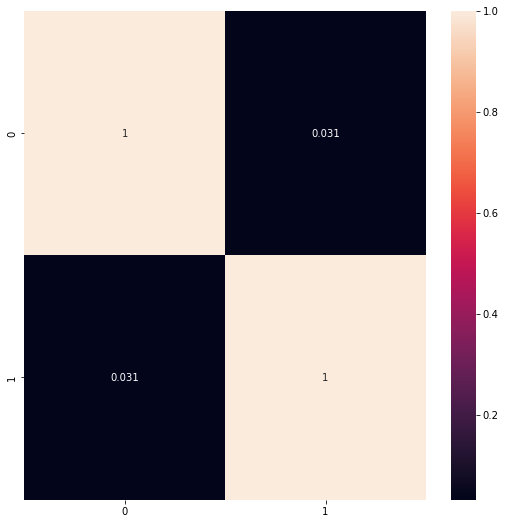

In [96]:
sns.heatmap(np.corrcoef(
    data_spb_center[data_spb_center['city_centers_nearest'] != -1]['last_price'],
    1 / data_spb_center[data_spb_center['city_centers_nearest'] != -1]['city_centers_nearest']),
            annot=True);

Близкое к нулю значение говорит об отсутствии зависимости.  
Это первое отличие квартир в центре Санкт-Петербурга от квартир в общей выборке.

floor_type
Другой       8308361.0
Последний    7937790.5
Первый       6476151.0
Name: last_price, dtype: float32

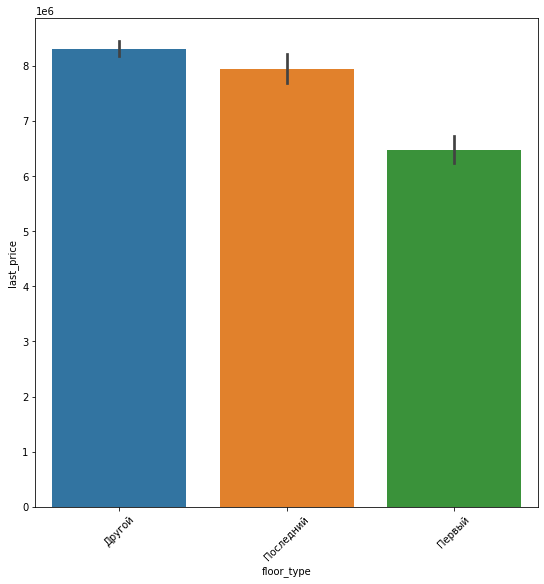

exposition_day
Sun    8169032.0
Wed    8138157.5
Fri    8100563.5
Mon    8037460.0
Tue    7930326.5
Thu    7900915.0
Sat    7813745.0
Name: last_price, dtype: float32

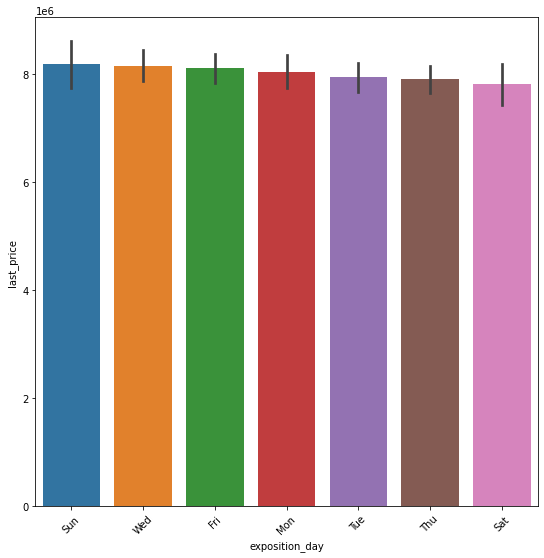

exposition_month
9     8746939.0
1     8151894.0
8     8150739.5
3     8100107.5
4     8097466.5
2     8032719.0
11    7966005.5
10    7920521.0
7     7860902.0
5     7763201.0
6     7581059.5
12    7476308.5
Name: last_price, dtype: float32

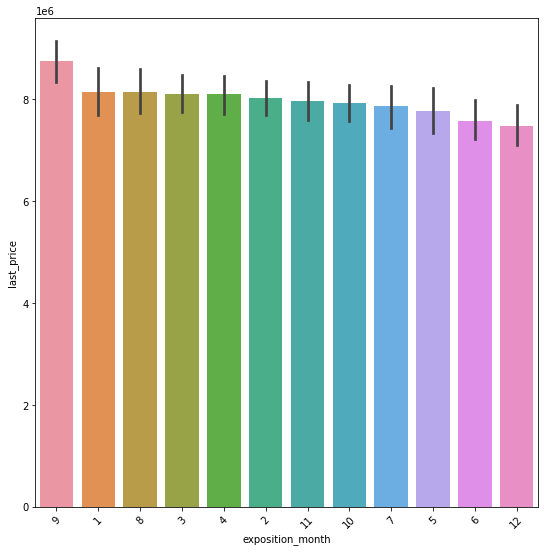

exposition_year
2015    8215075.5
2019    8088946.5
2016    8061741.0
2017    7987706.0
2018    7932739.0
2014    7670500.0
Name: last_price, dtype: float32

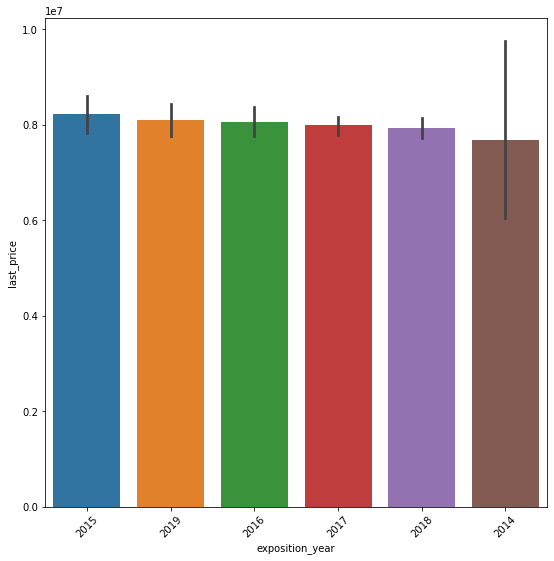

In [97]:
for col in ['floor_type', 'exposition_day', 'exposition_month', 'exposition_year']:
    show_mean_by_droup(col, df=data_spb_center)

**ВЫВОД:**  
Наибольшее количество отличий наблюдается на этих графиках.  
1) Самые дорогие квартиры в центре СПб находятся не на *последнем* этаже, как во всей остальной выборке, а на *другом*. Квартиры на *первом* все еще самые дешевые.  

2) Не наблюдается зависимости цены от дня размещения объявления. Все цены приблизительно на одном уровне, а самая низкая - в *субботу*. Для всей выборки наоборот объявления с самыми дорогими квартирами размещались по *субботам*.  

3) Самые дорогие квартиры были размещены в *сентябре*, а самые дешевые в *декабре*. *Ноябрь*, *март* и *апрель* в этой подвыборке являются самими обычными средними месяцами.  

4) Скачков цен от года к году не наблюдается. Среди объявлений 2014 года очень большой разборс цен, но средняя цена наименьшая.

## Общий вывод

В предоставленном наборе данных были обнаружены, описаны (см. *п.1.2*) и решены проблемы с пропусками (см. *п.2.2*), выбросами (см. *п.4.3*), названием столбцов (*п.2.2.8*) и типами данных (*п.2.3*).
  
В ходе исследовательского анализа данных были выявлены и описаны основные закономерности (*пп. 4.1, 4.2, 4.4*).
  
Отдельно рассмотрен центральный район Санкт-Петербурга. Сделано сравнение с аналогичными закономерностями для всего остального датасета. Были найдены как сходства, так и различия. Подробнее с ними можно ознакомиться в *п.4.7*. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод